##  Assignment: Predicting Housing Prices 

In [2]:
#Overarching model building questions:
#1. Are decision  trees impacted by feature selection and feature engineering?
#2. What to do with a dataset with many outliers?
#3. How to impute anomalies without losing data?
#4. How to detect underfitting/overfitting?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/aanchalkhanna72/Datasets/main/kc_house_train_data.csv")
data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### Our initial hypotheses were:

1. Prices are positively correlated with number of bedrooms,bathrooms, living and lot area in sqft, grades, views, waterfront presence, condition, basement area.
2. Prices are negatively correlated with year of renovation (if considered as number of years since renovation, ie, fewer years since renovation-->newer property-->higher price)
3. Certain zipcodes will have higher house prices due to higher living,lot area, higher  number of views, waterfront, etc. 
4. We assume a high correlation between some sets of predictors. For eg, bedroooms and sqftliving, number of floors and basements


 
Since the remaining variables have a large number of values as outliers, we will not remove or alter them as of now.  We will  work on them  during feature engineering.

### Experiment: Univariate Analysis


In [7]:
data=data.drop(columns=["id","lat","long"])

Categorical: ['date'] 

Discrete: ['waterfront', 'view', 'condition'] 

Continuous: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'] 

Description: date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object 

Are the variables categorized correctly? yes/no: yes


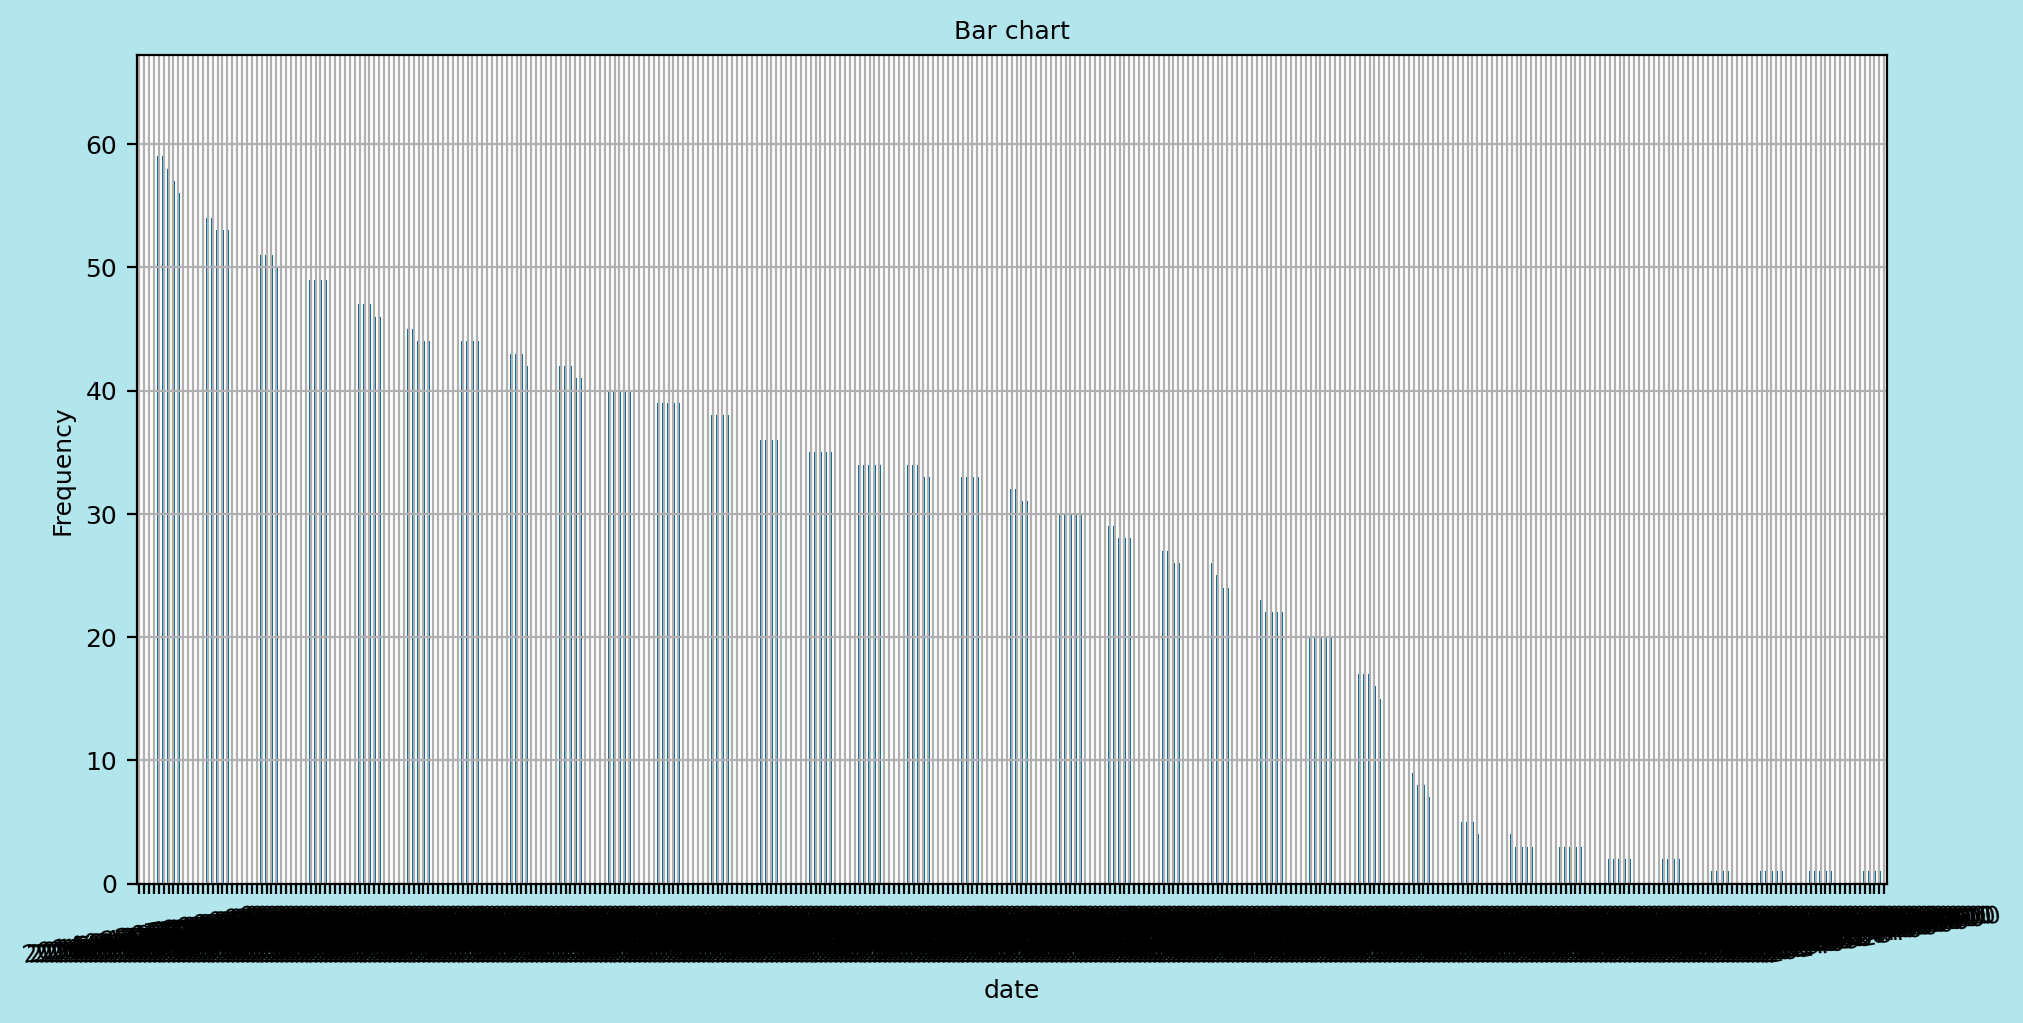

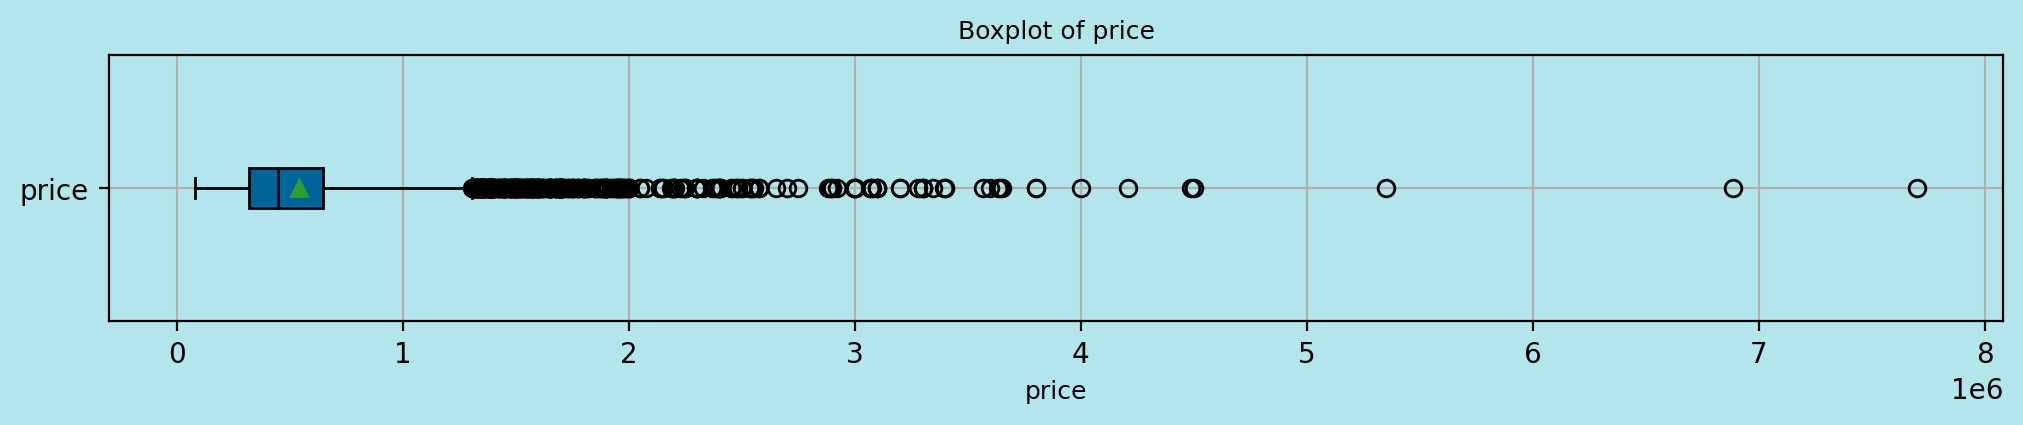

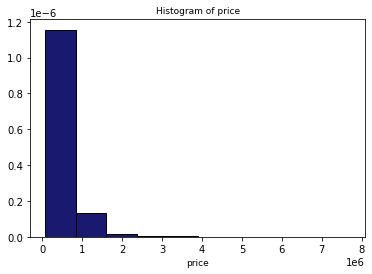

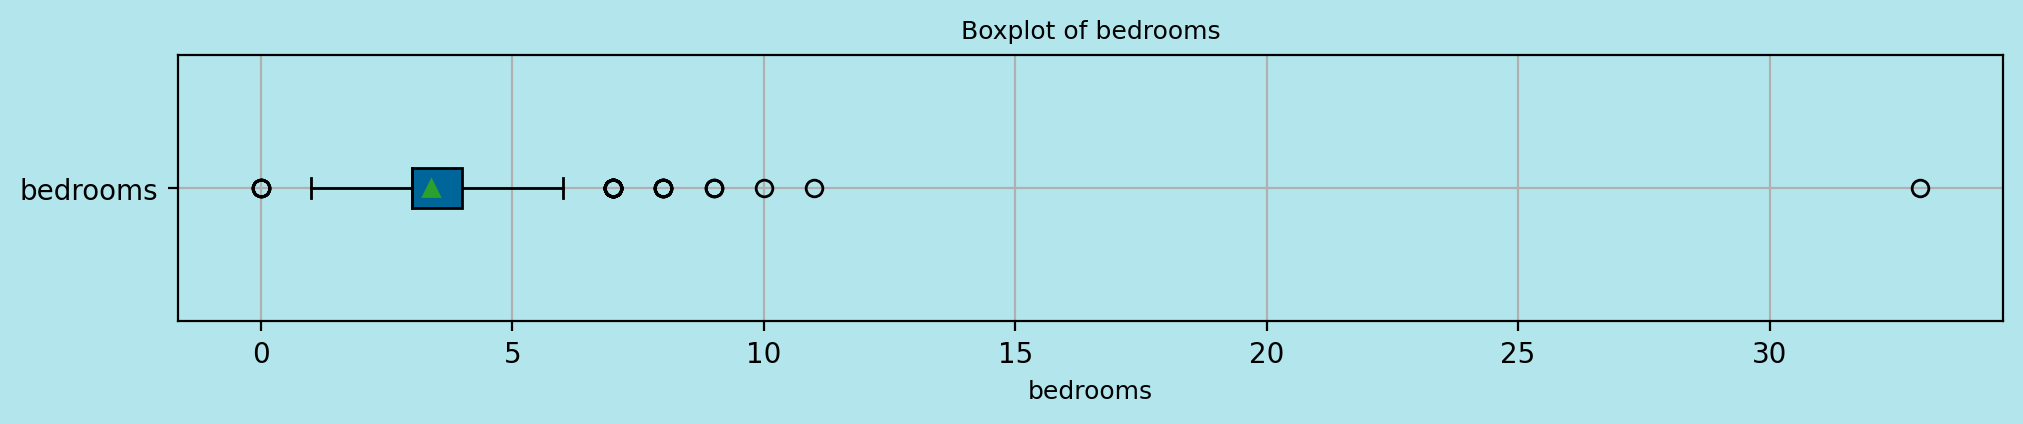

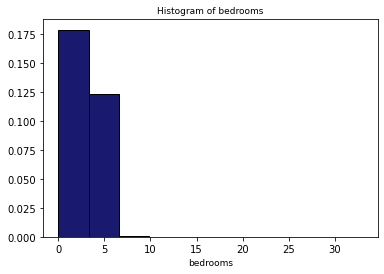

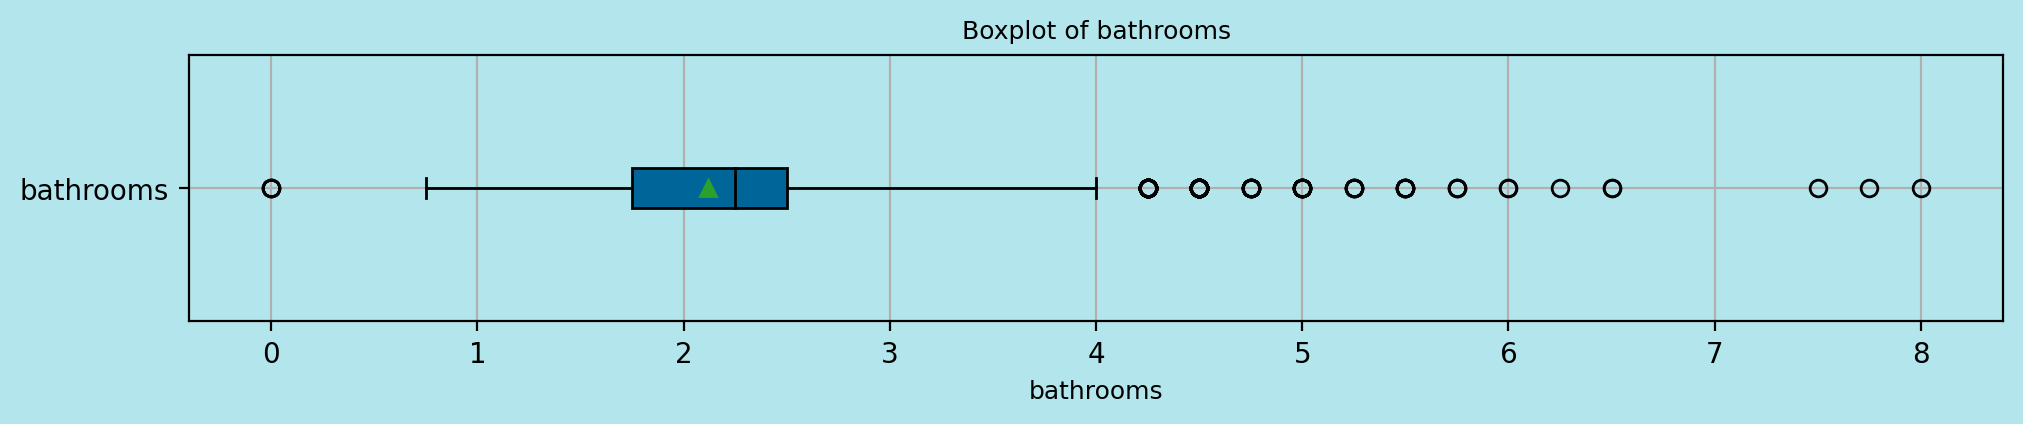

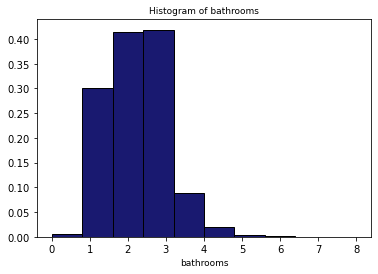

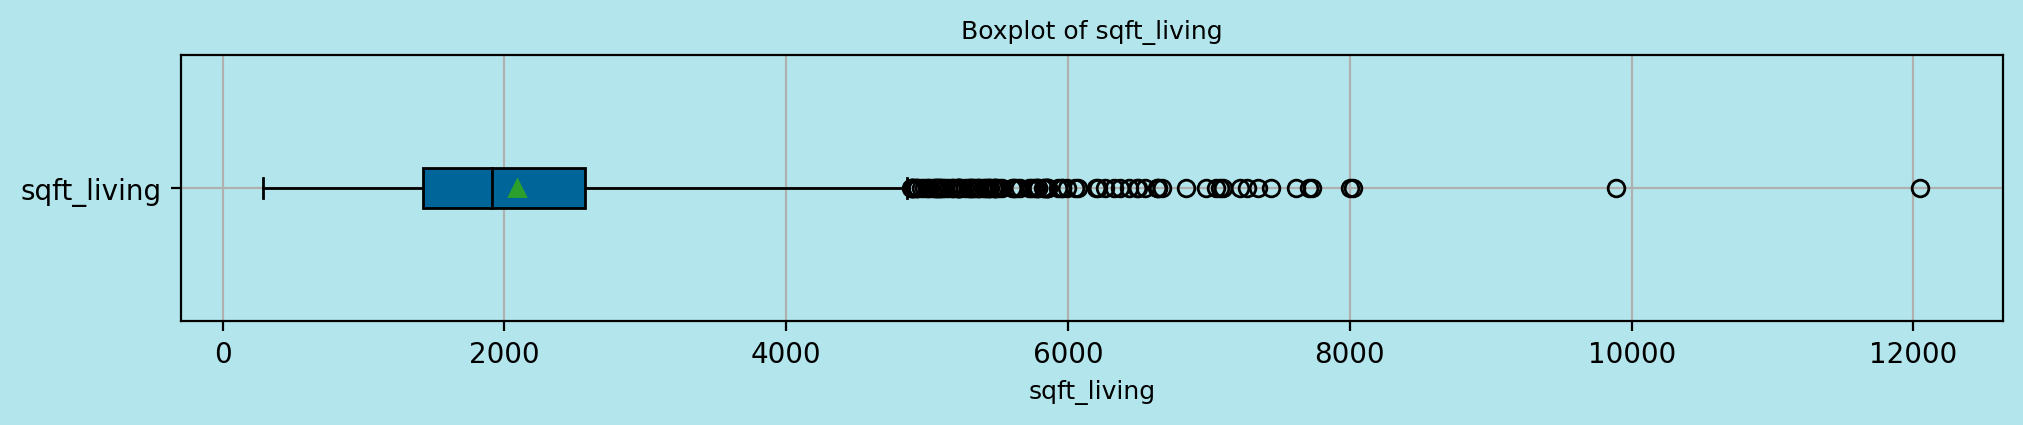

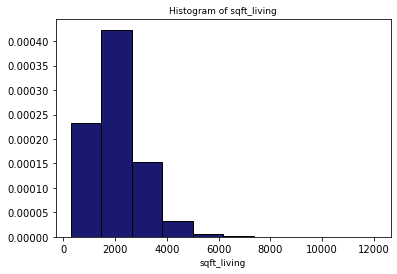

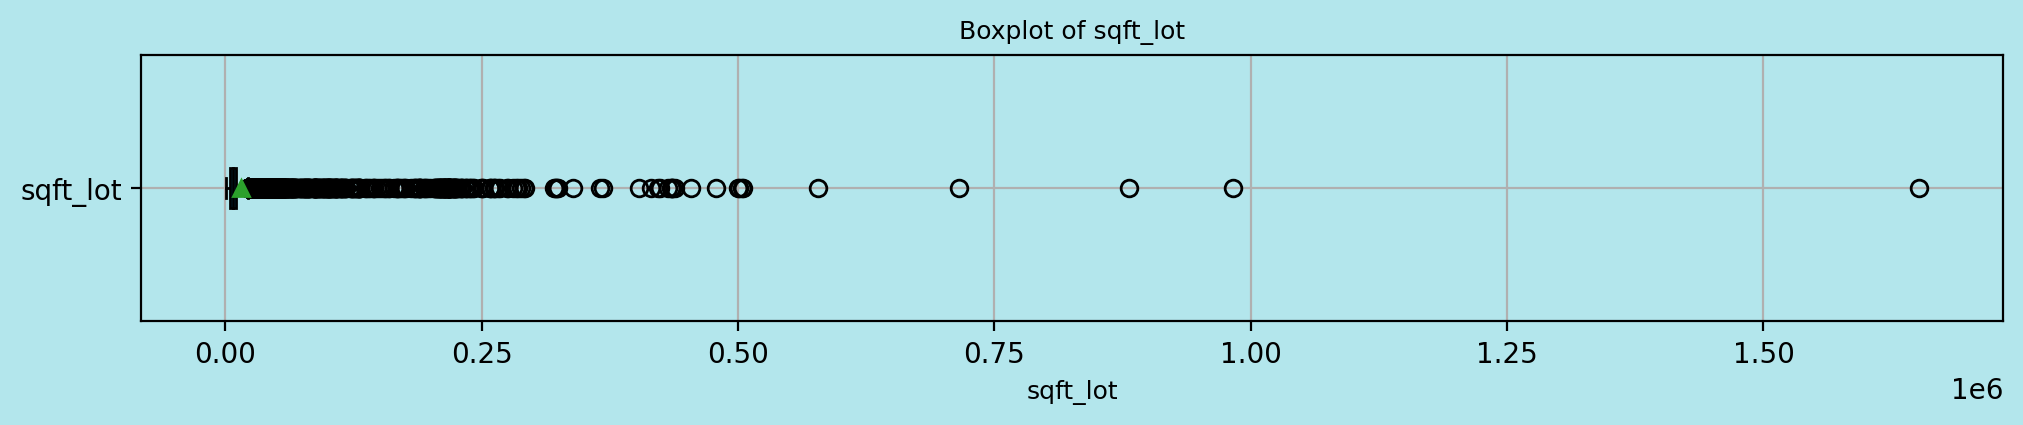

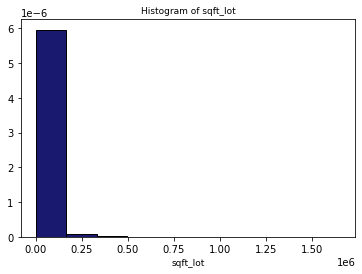

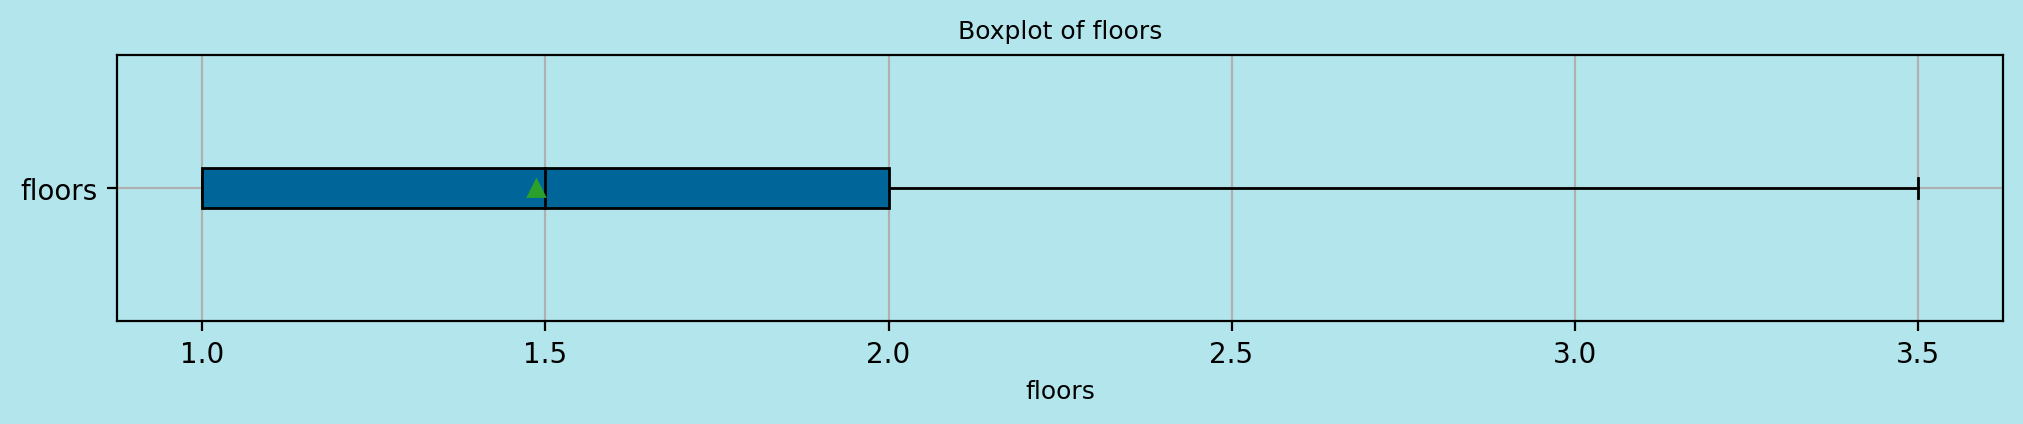

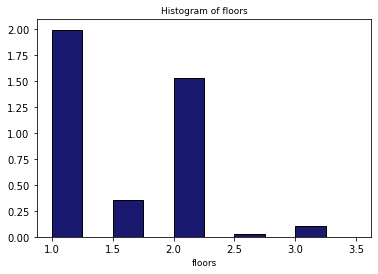

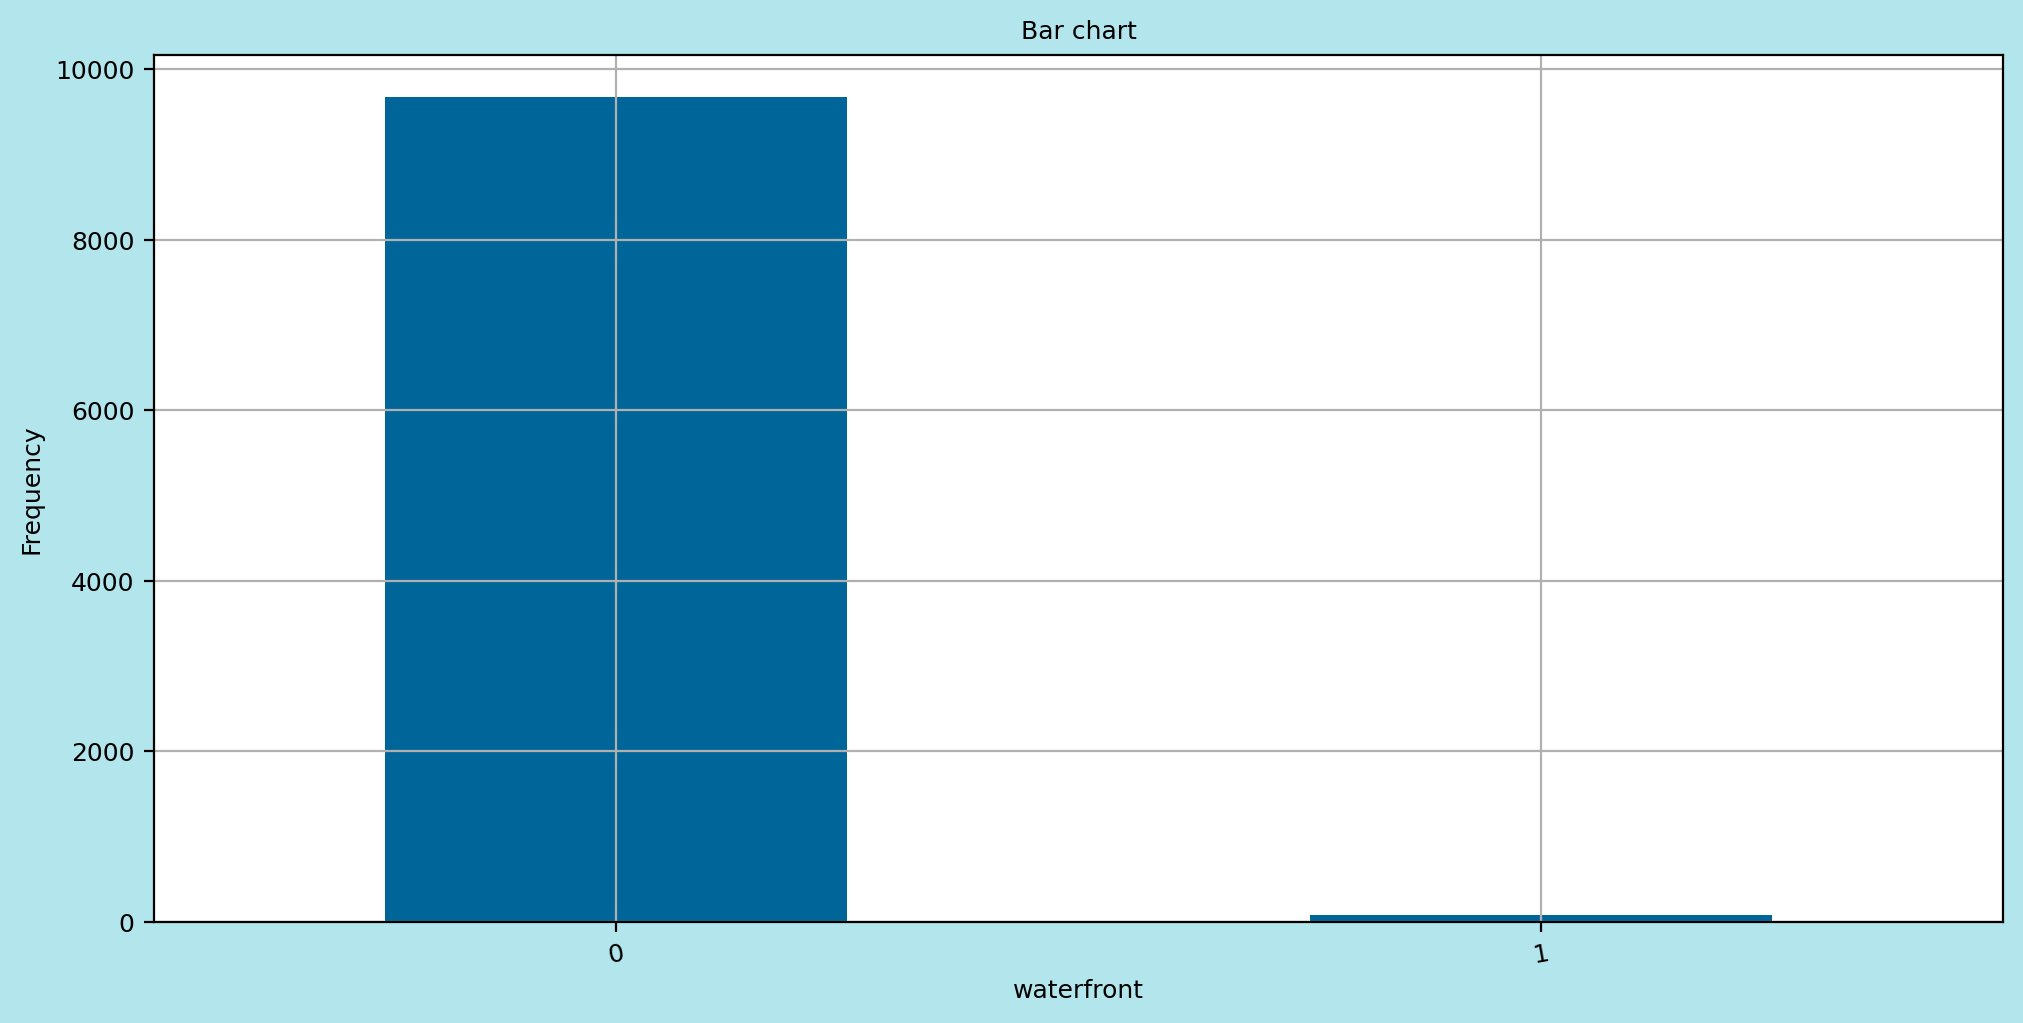

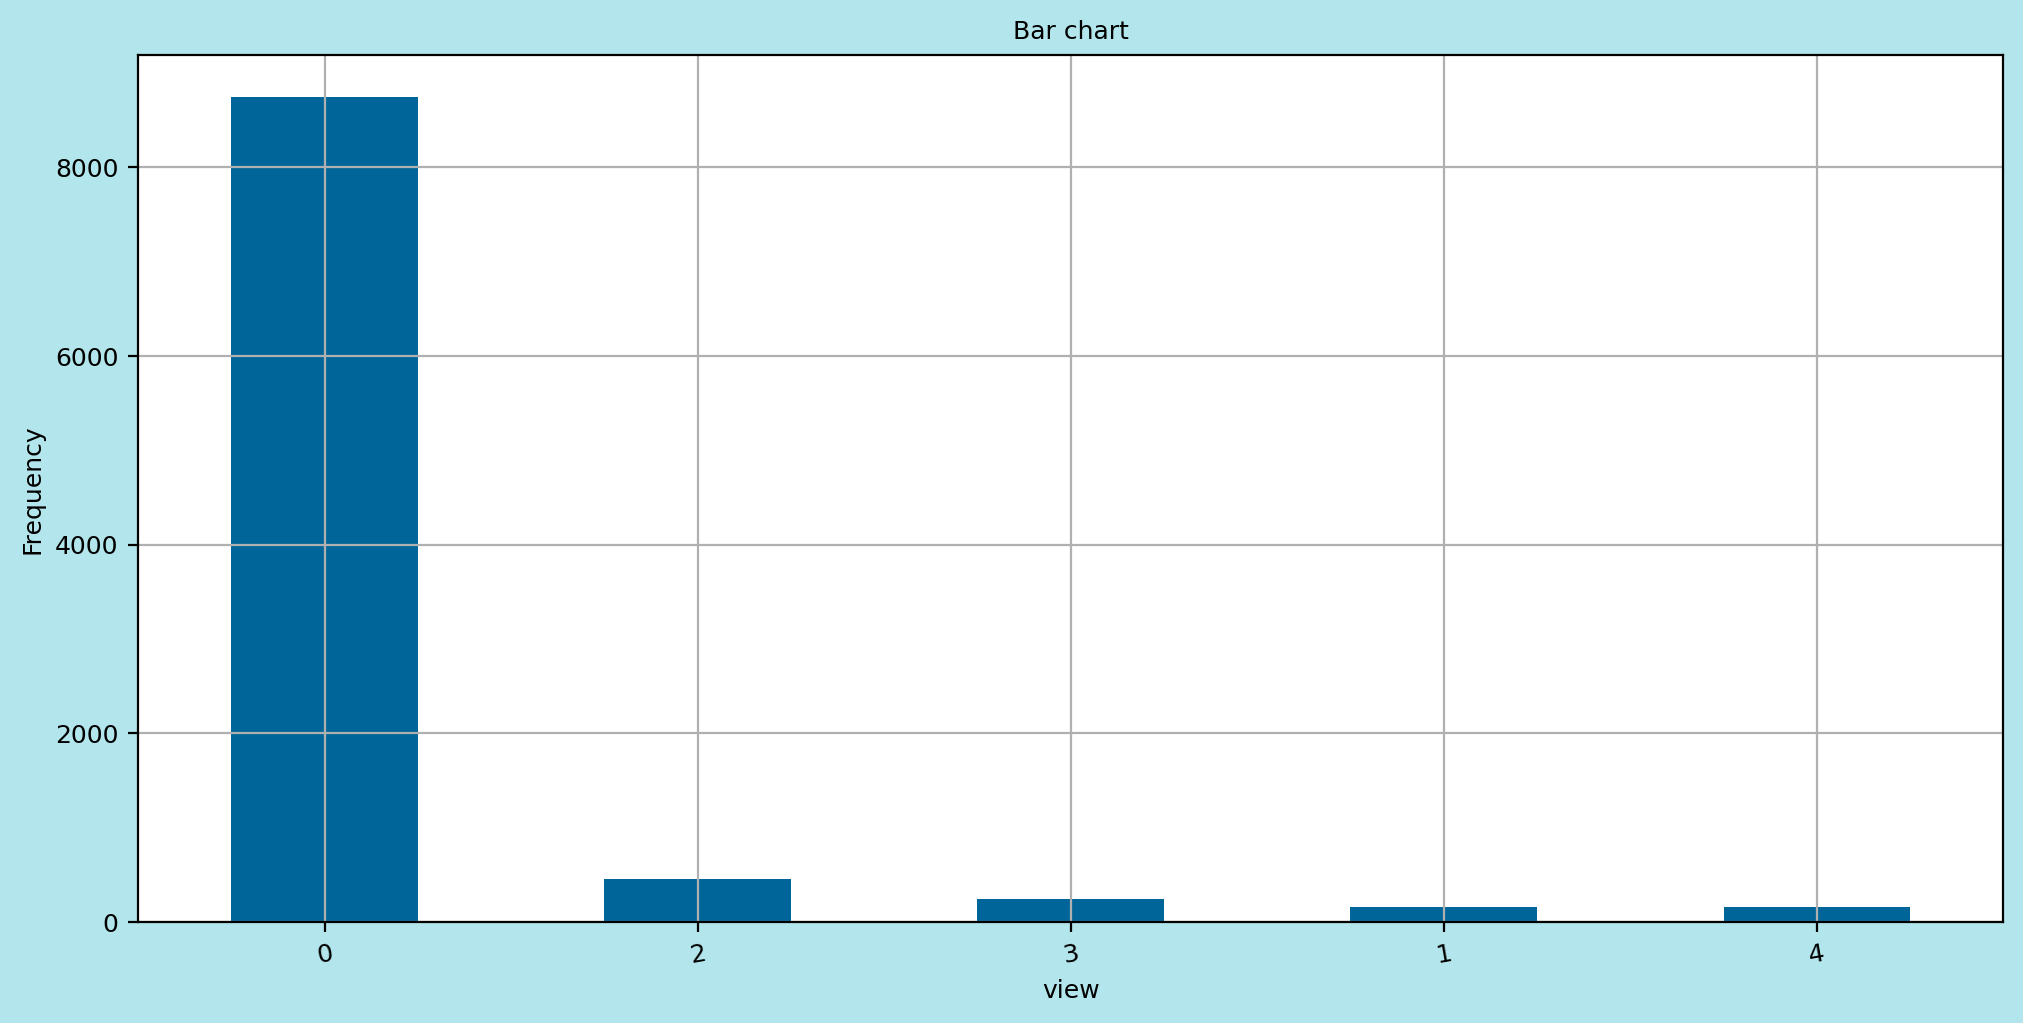

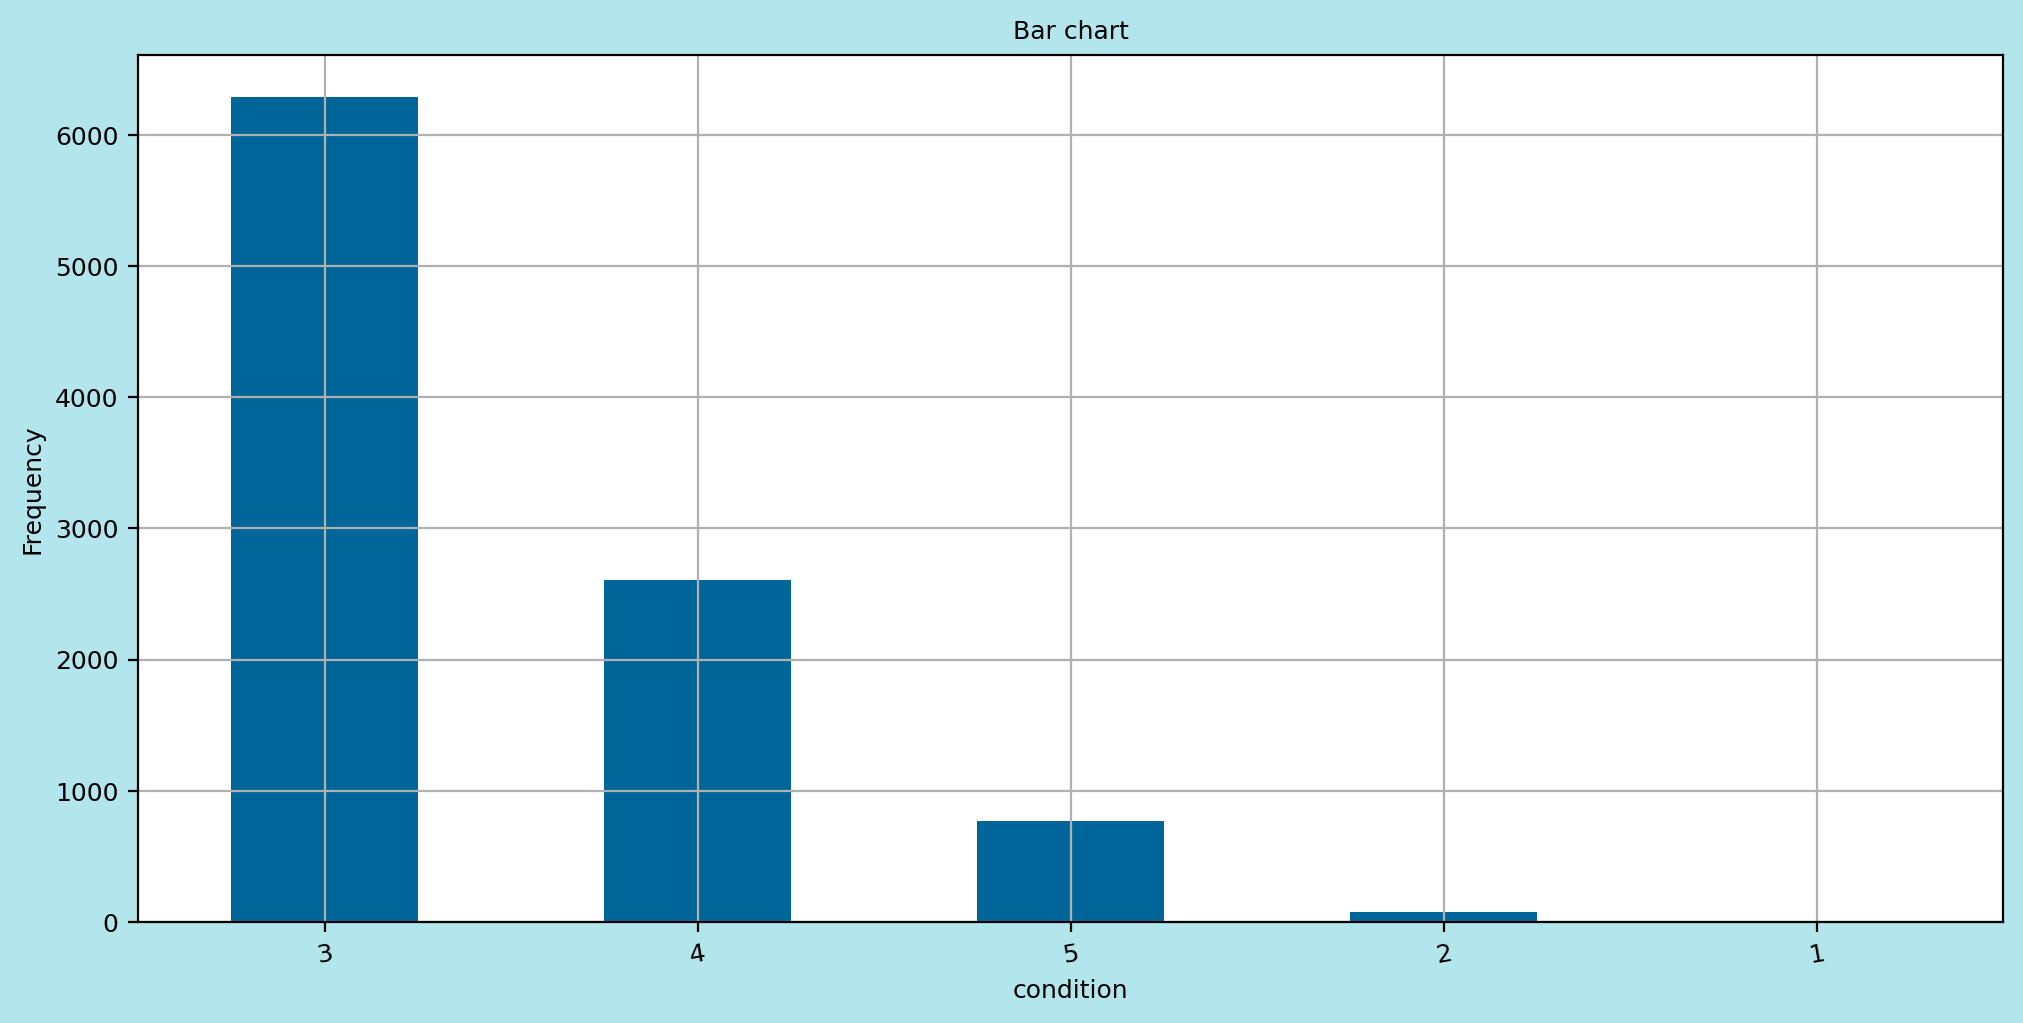

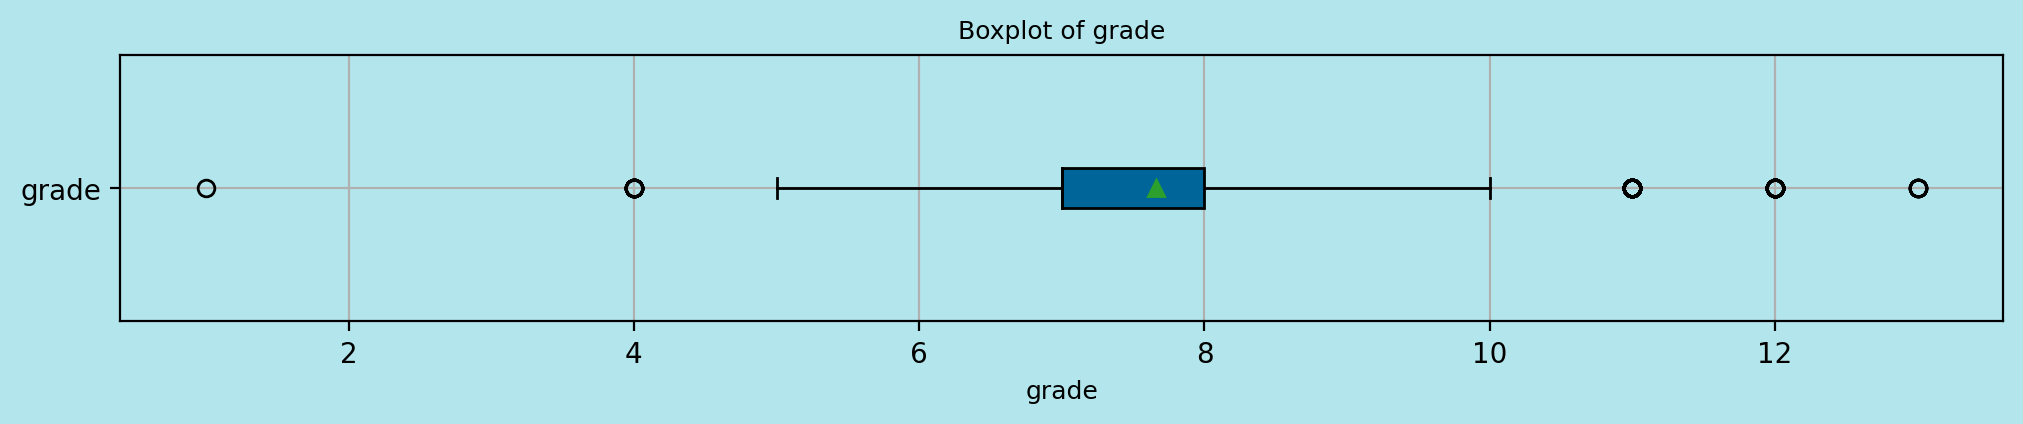

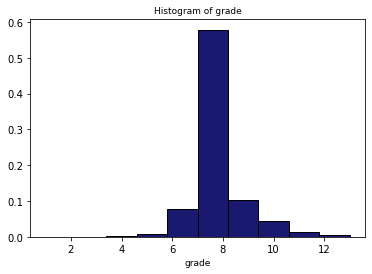

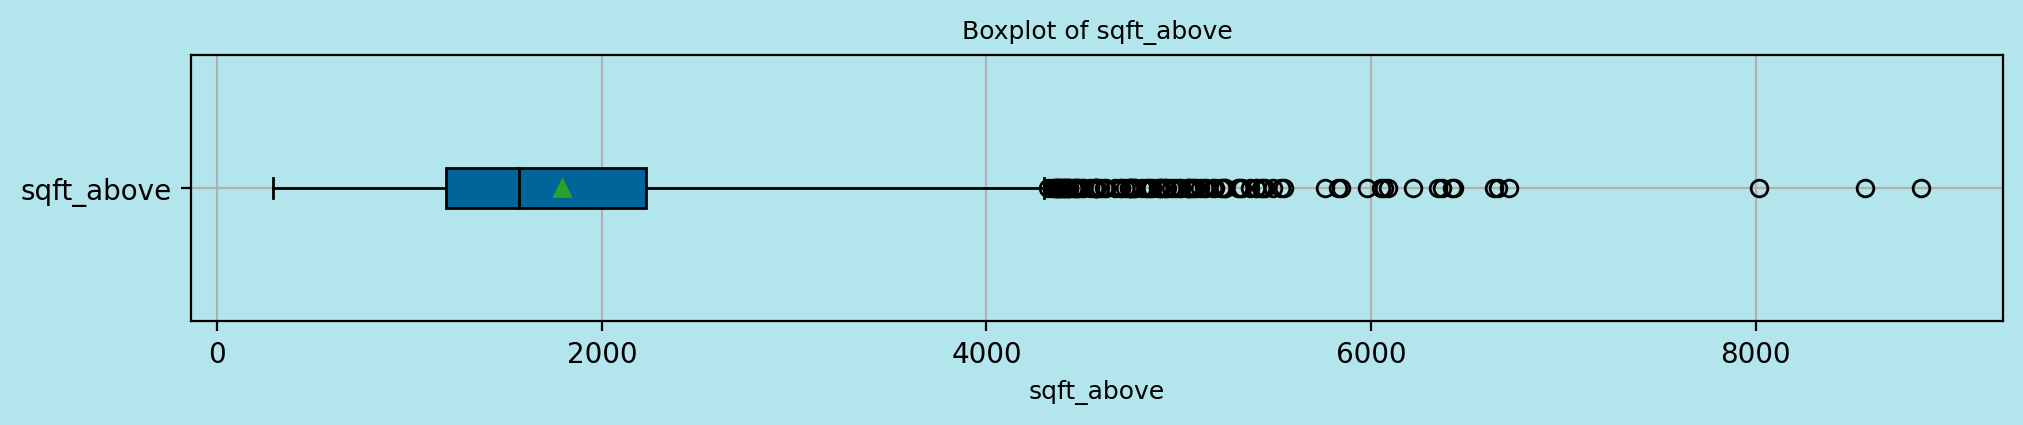

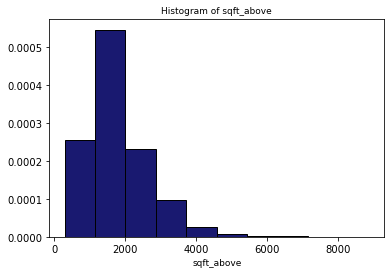

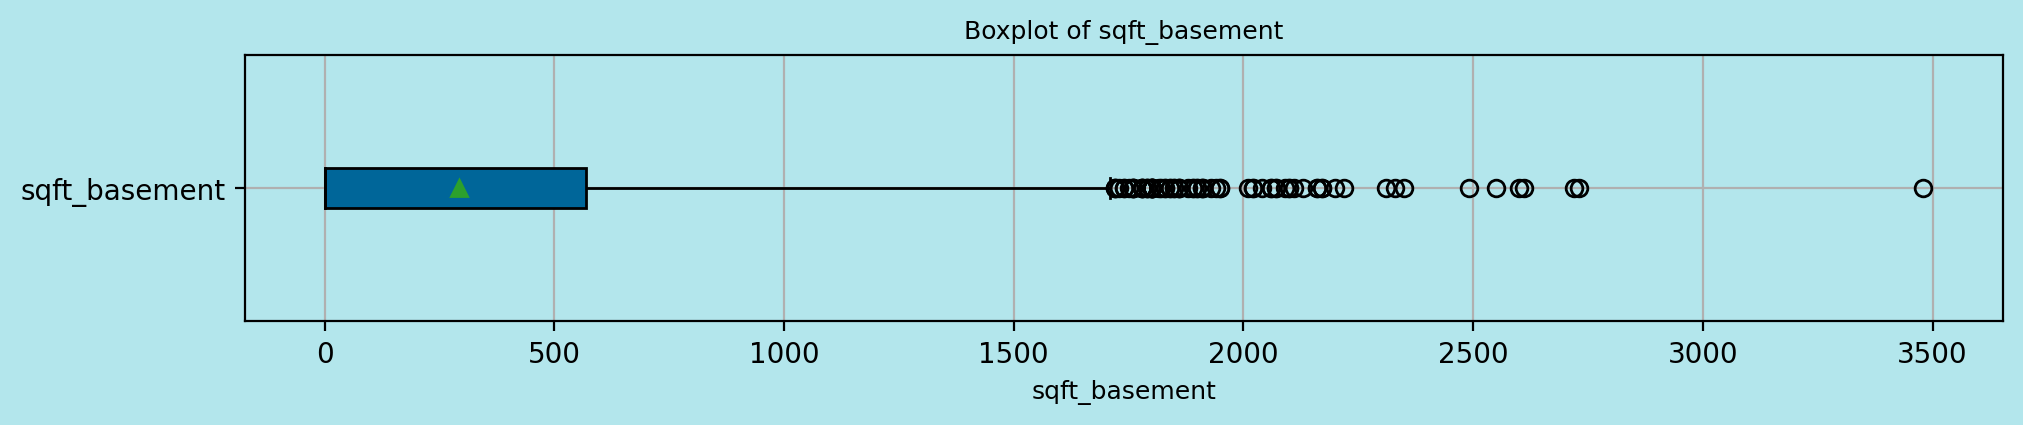

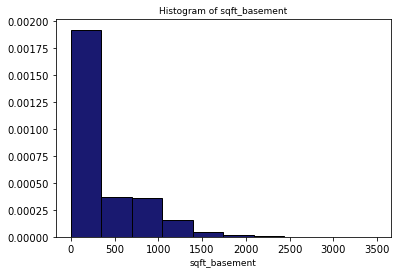

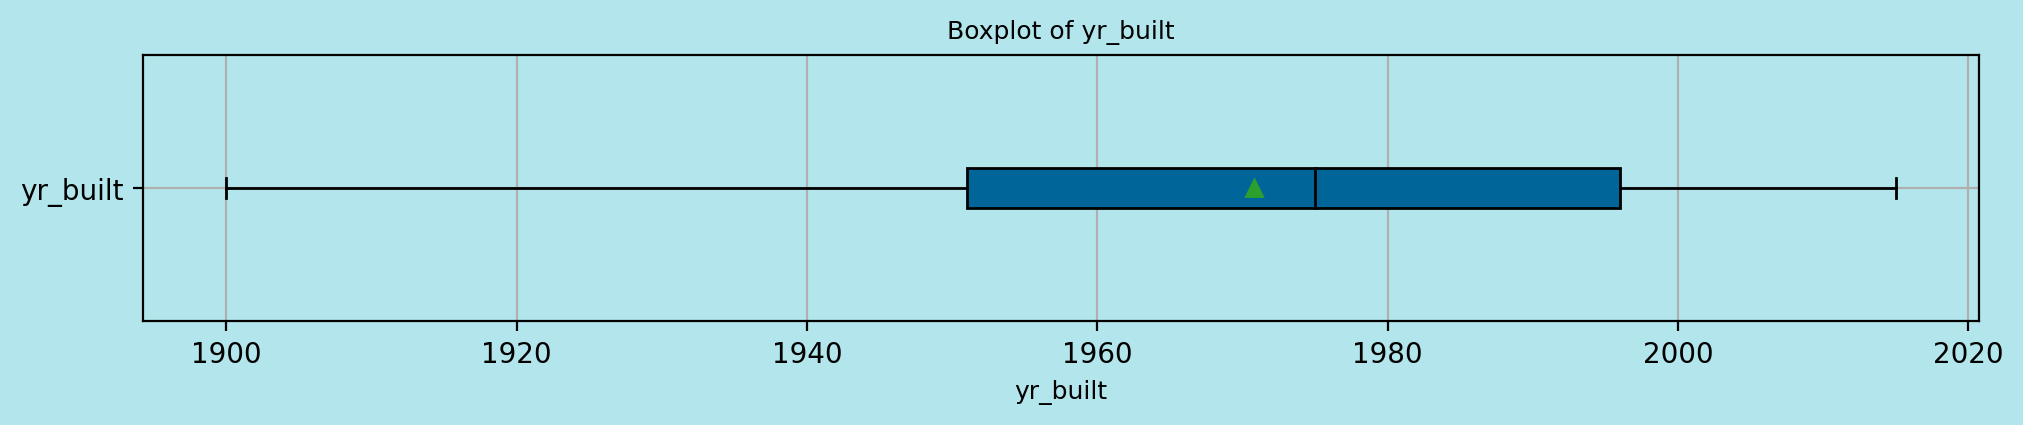

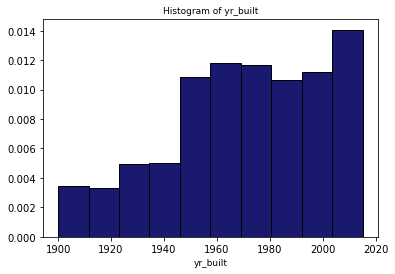

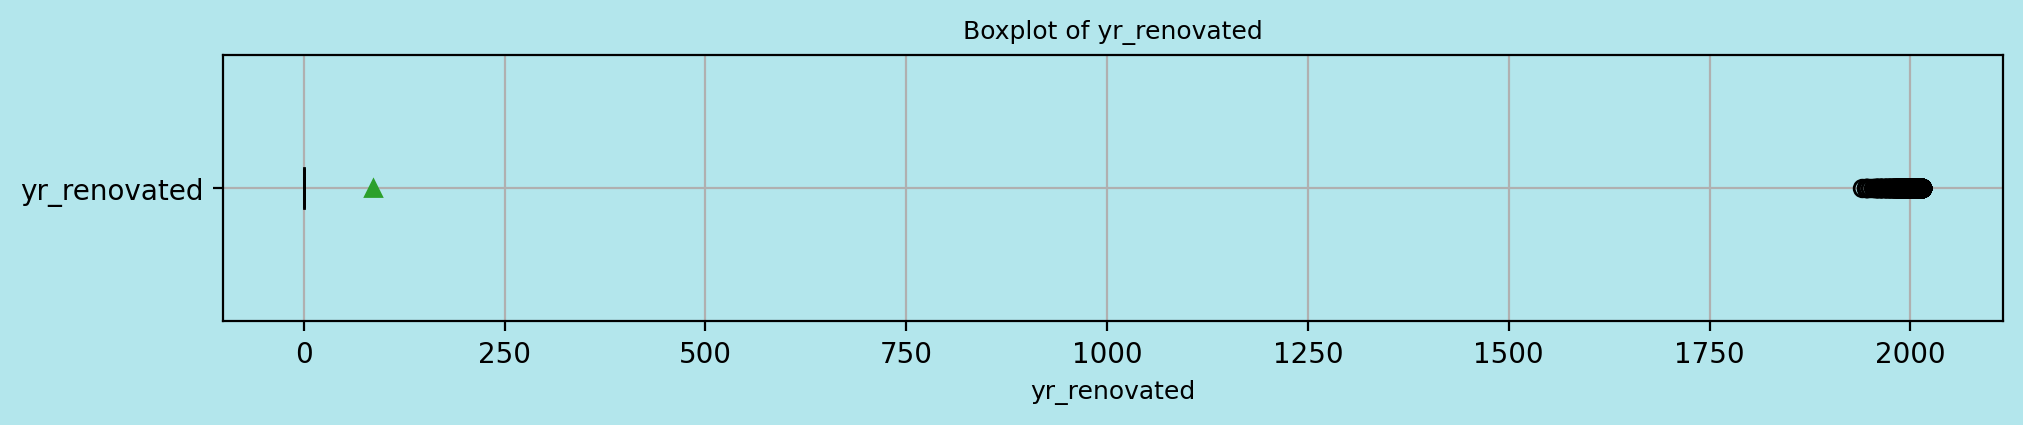

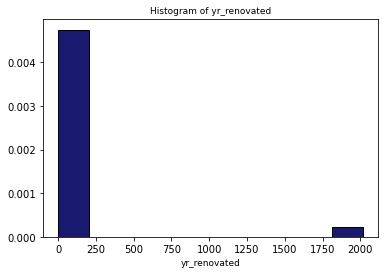

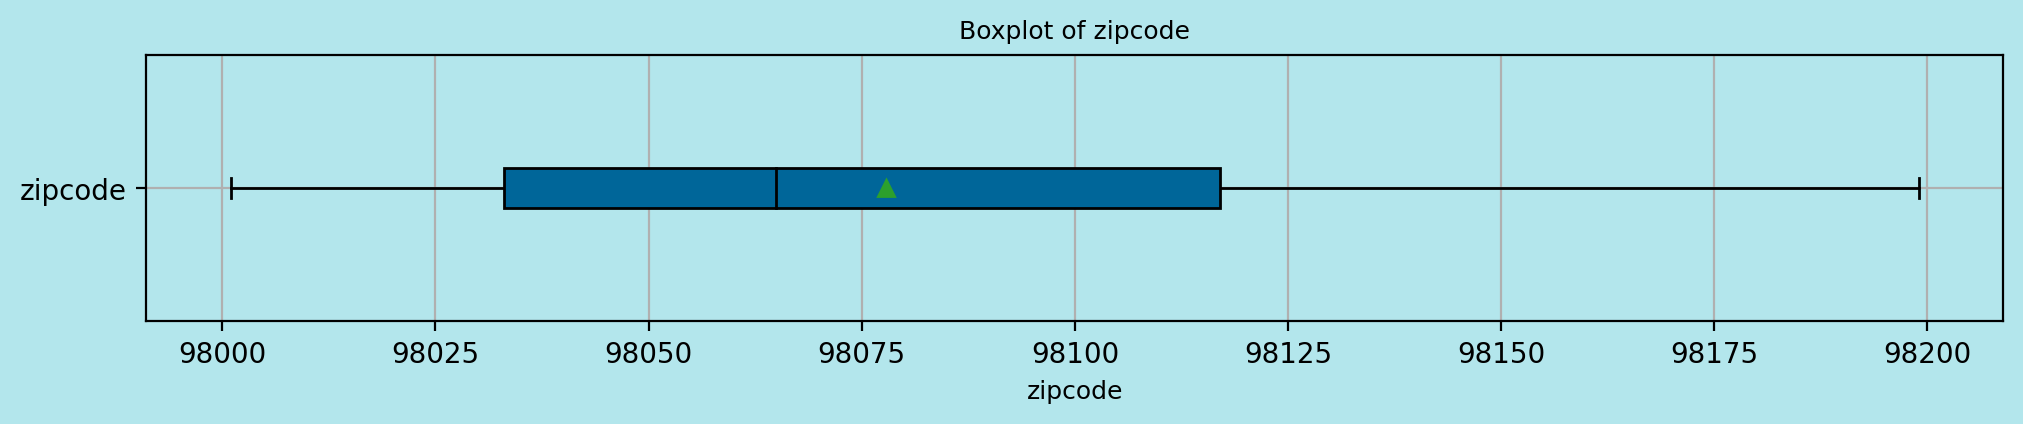

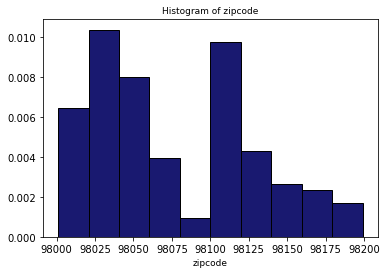

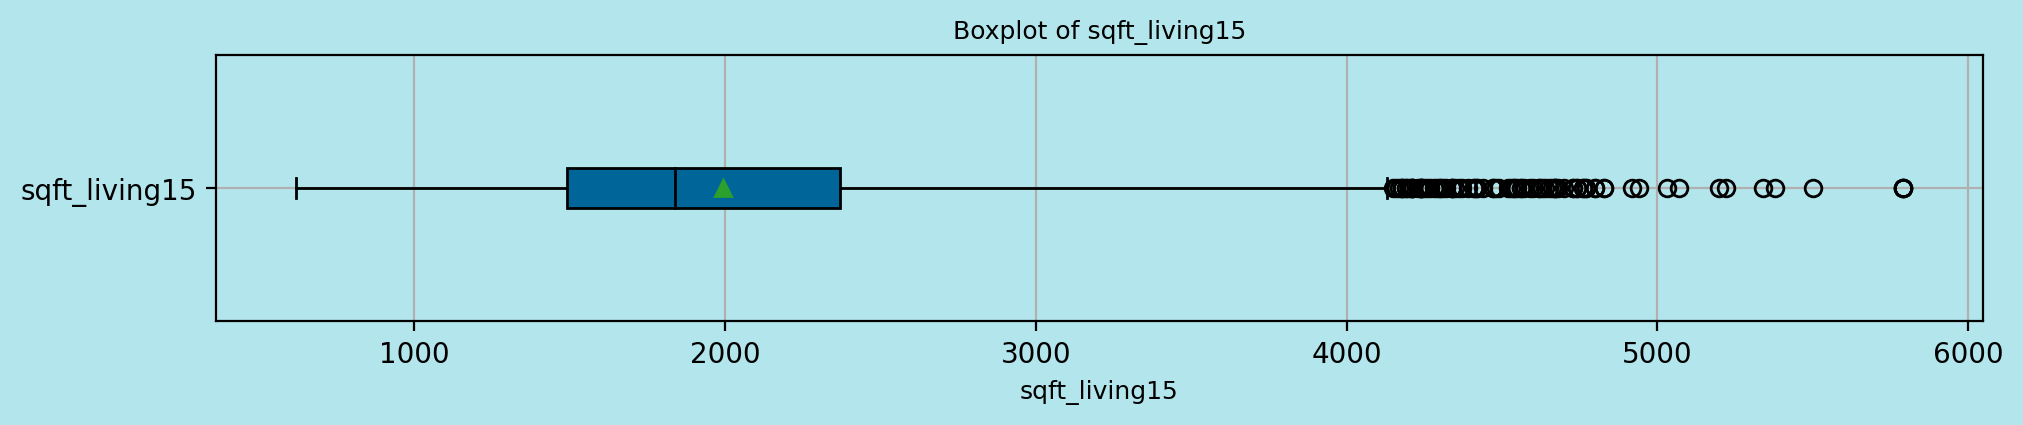

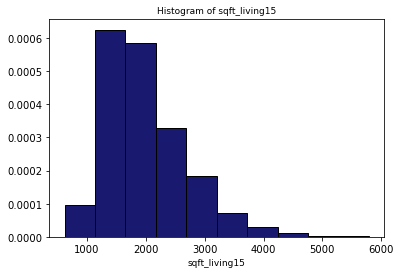

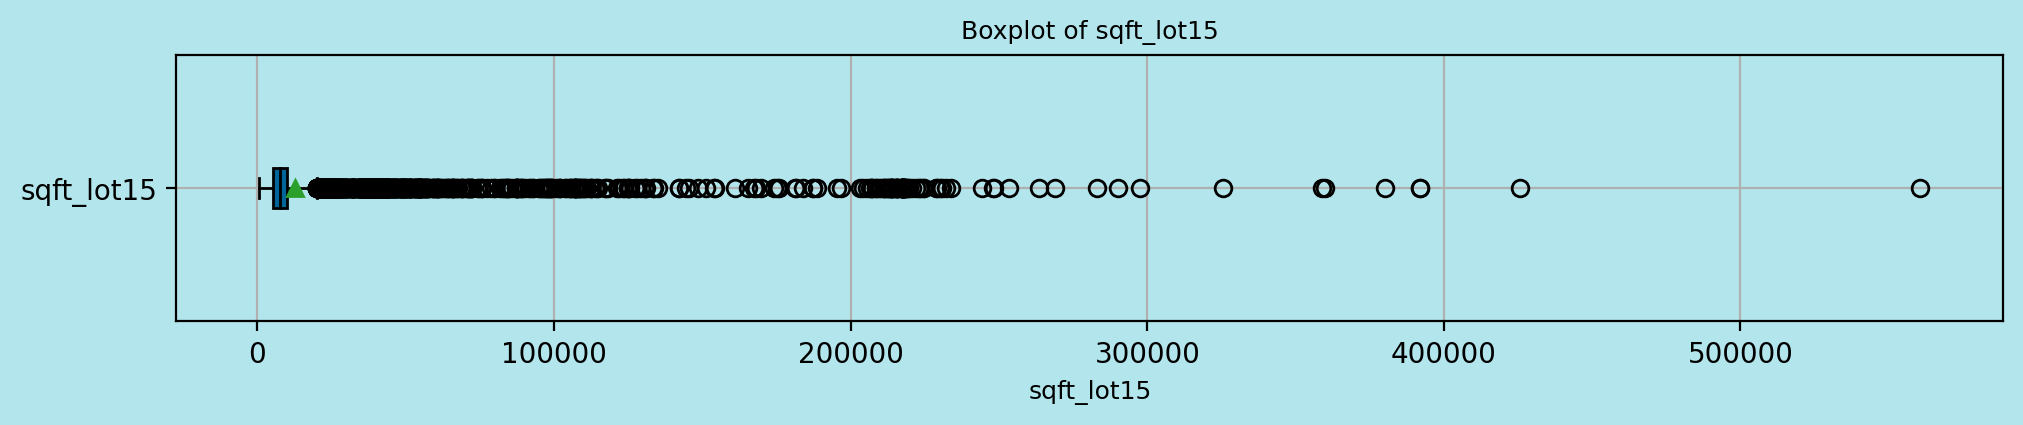

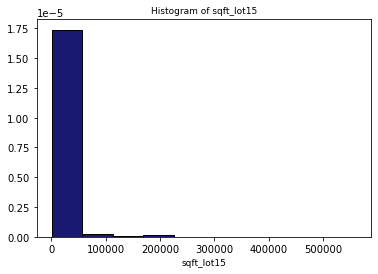


--------------------- 
Categorical: ['date'] 
Continuous: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'] 
Discrete: ['waterfront', 'view', 'condition']


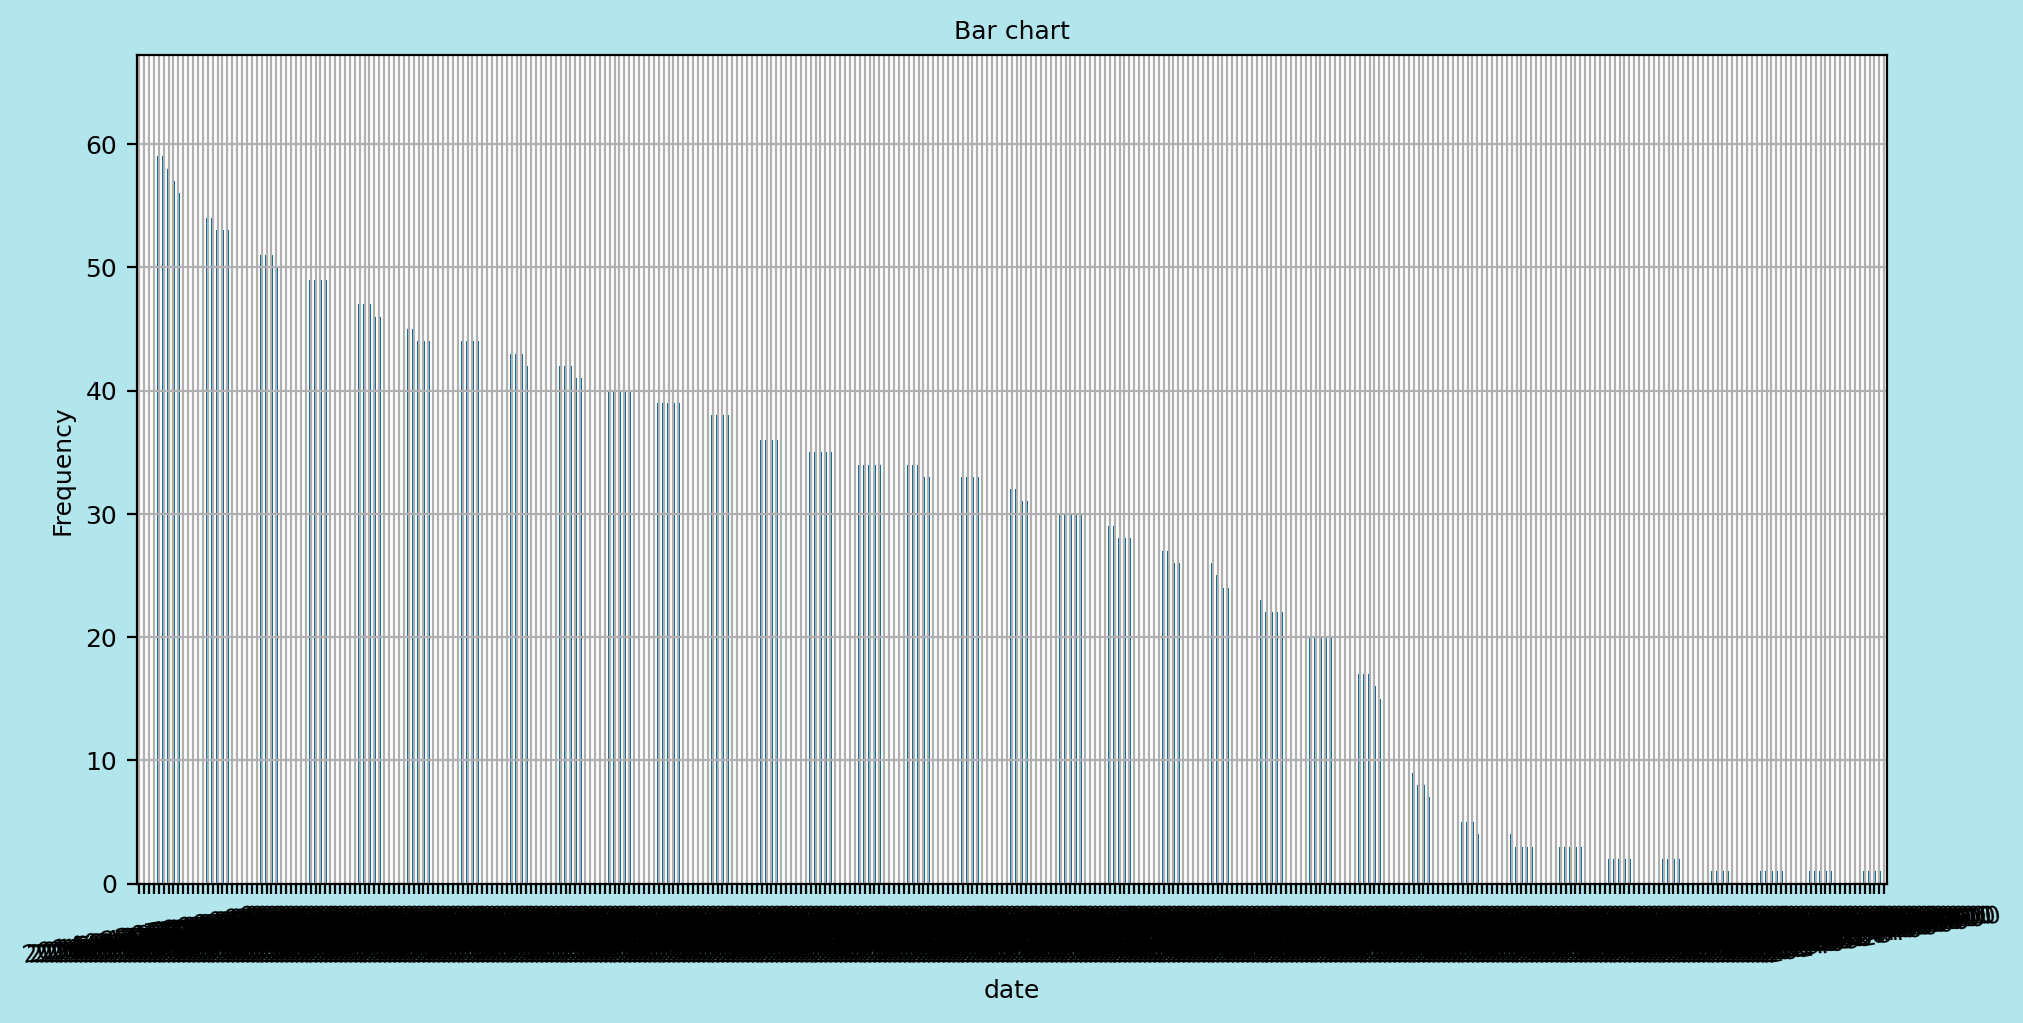

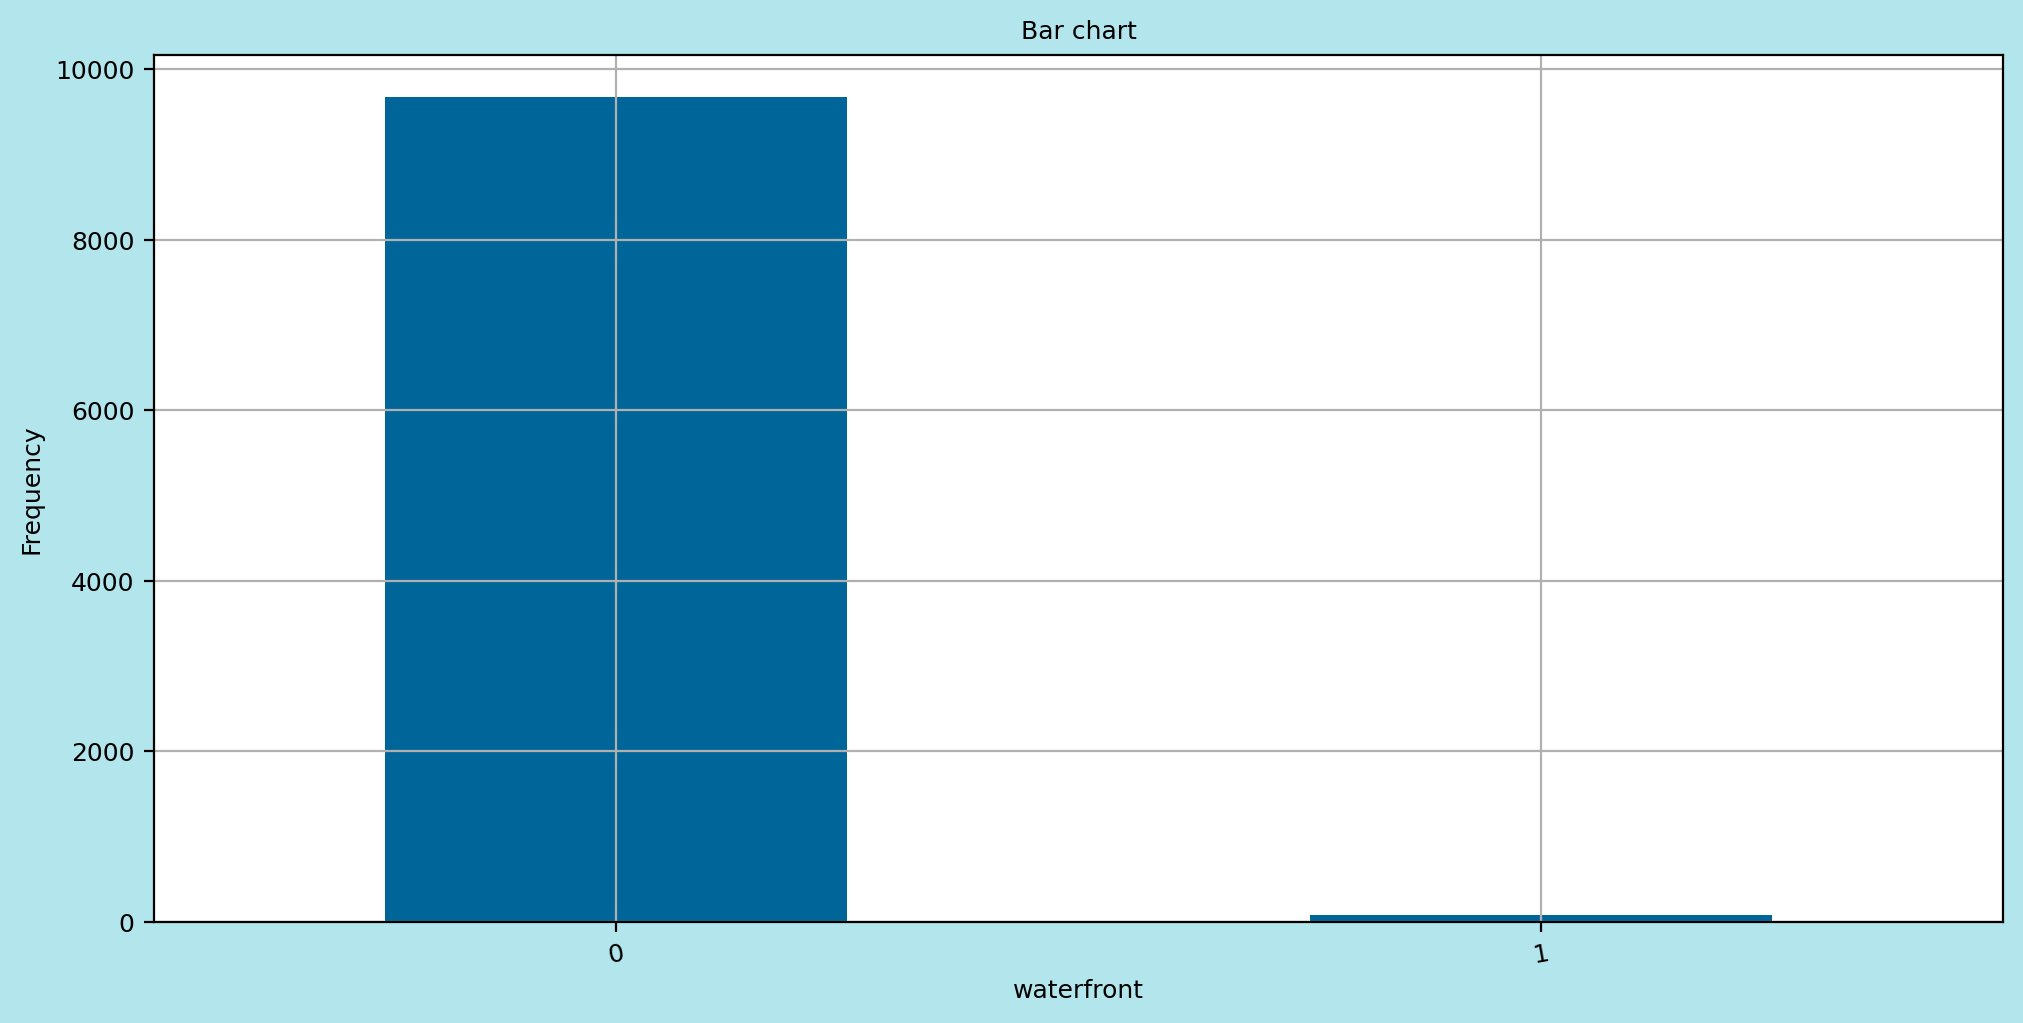

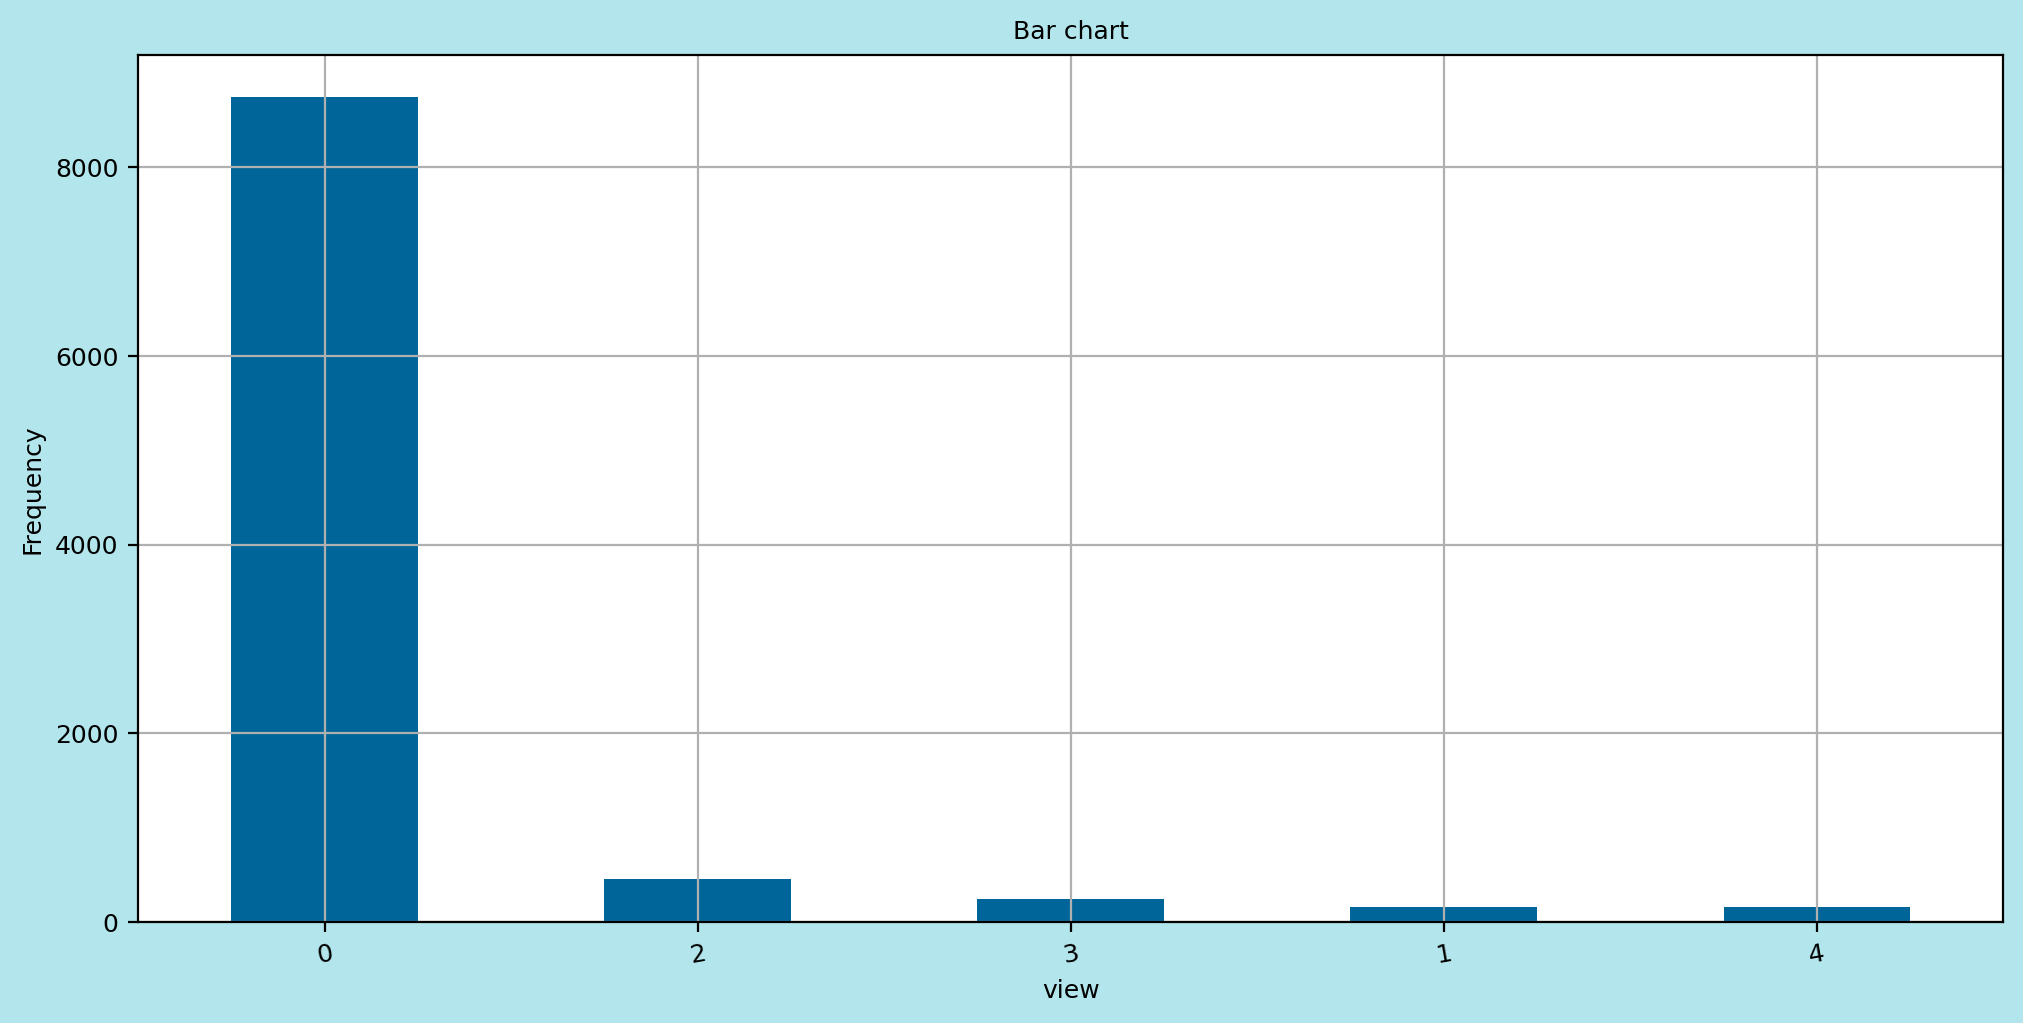

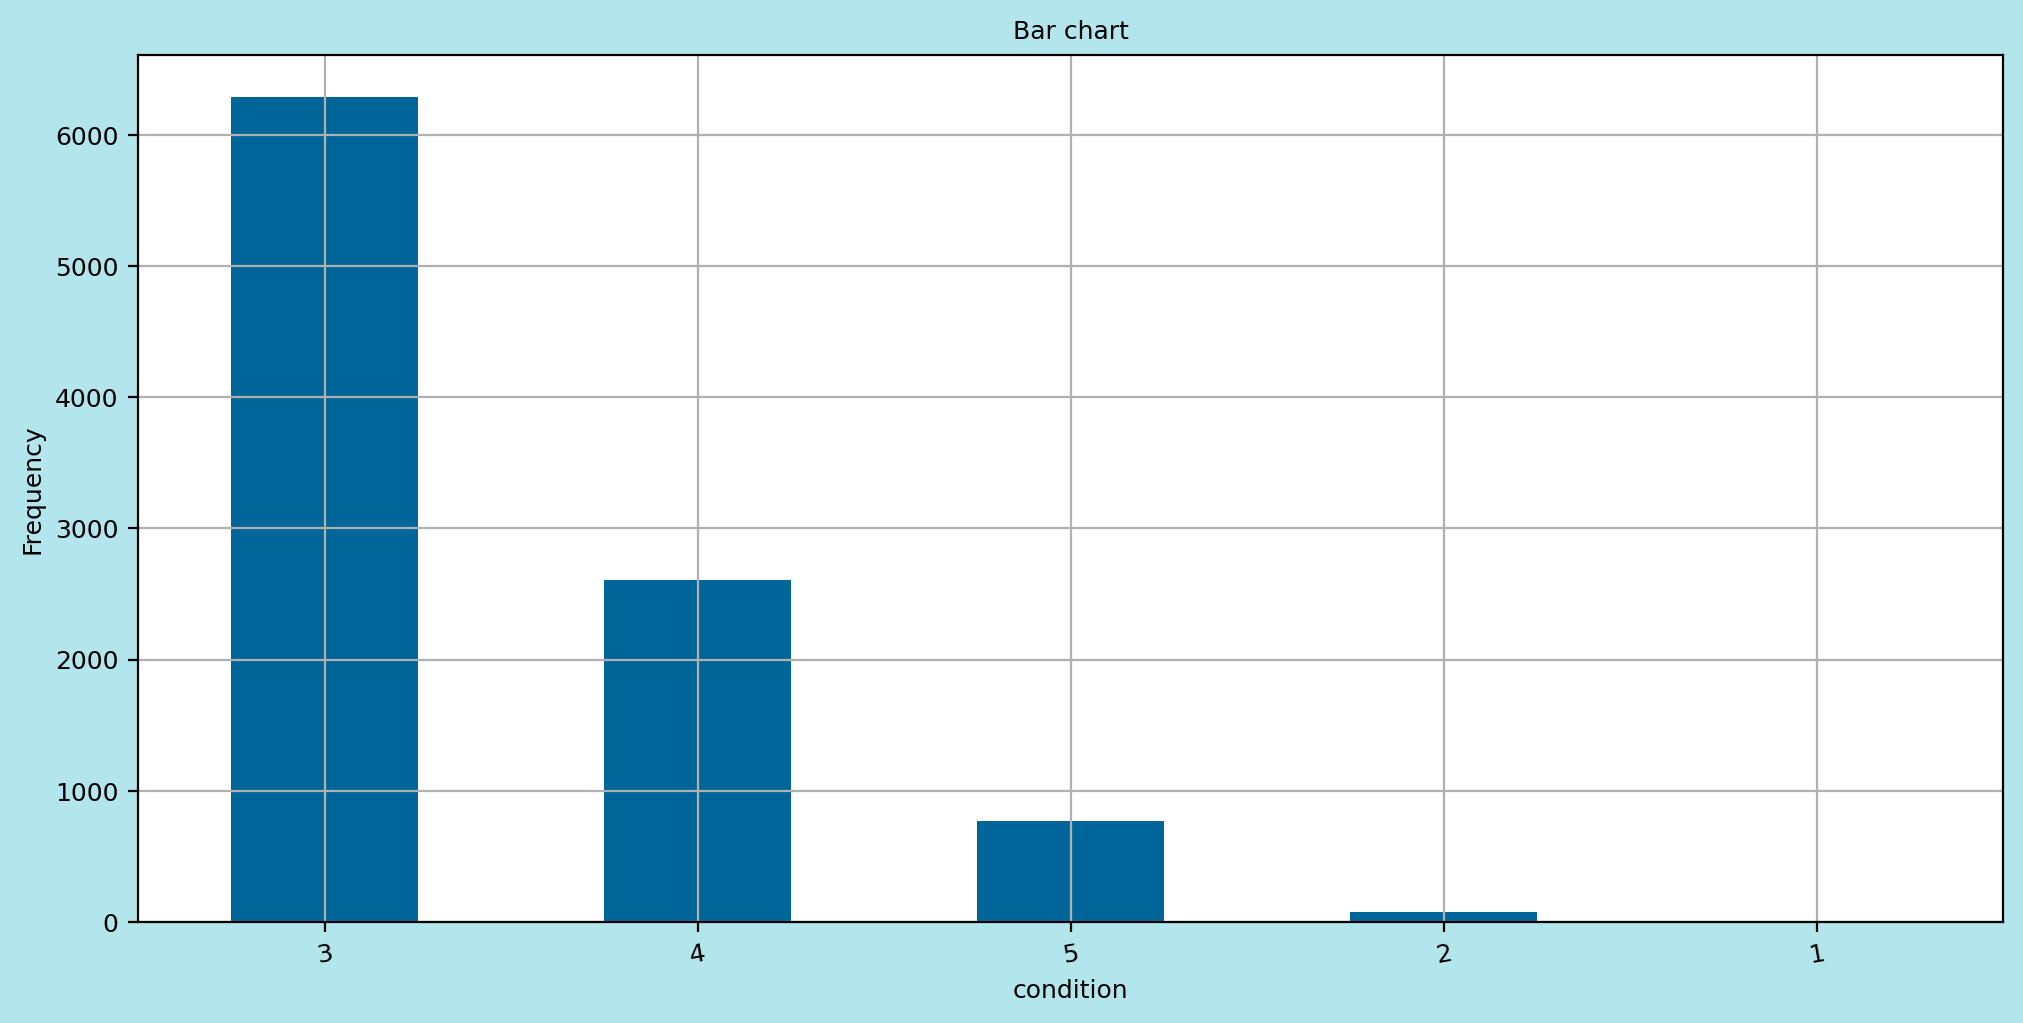

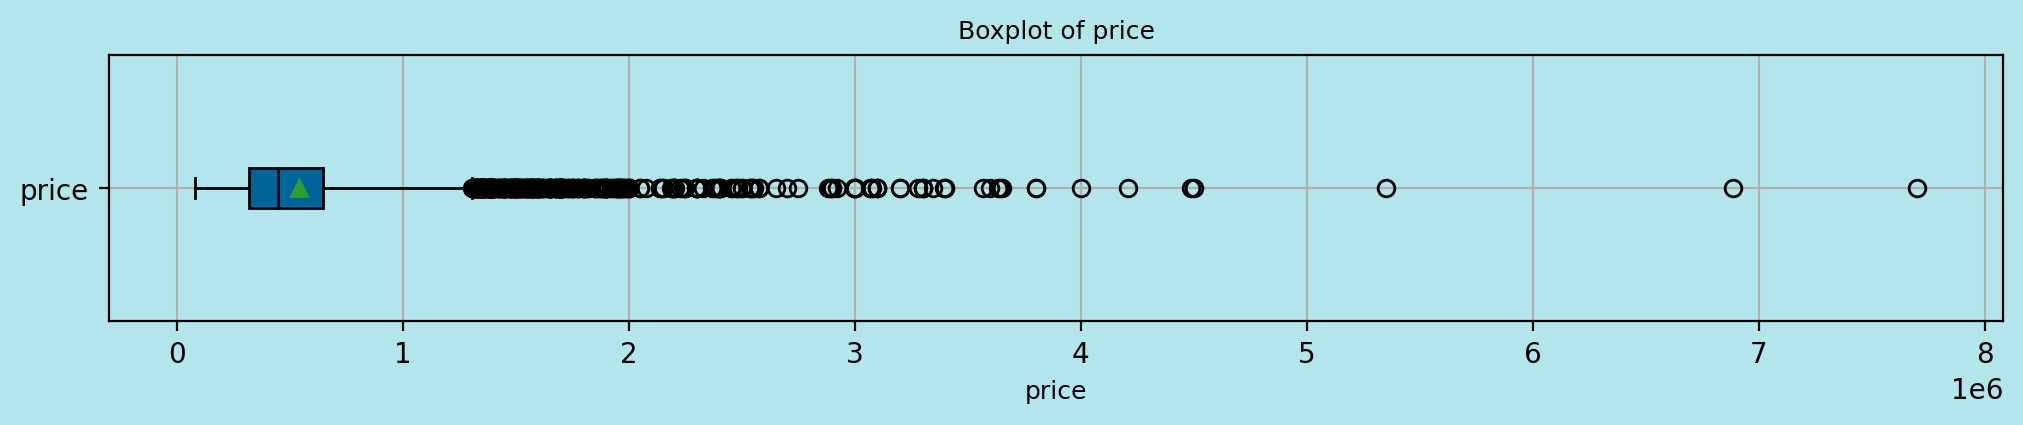

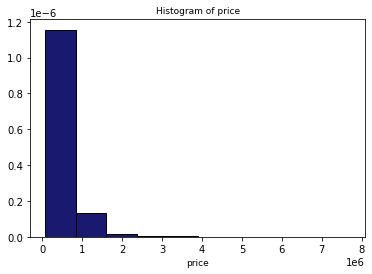

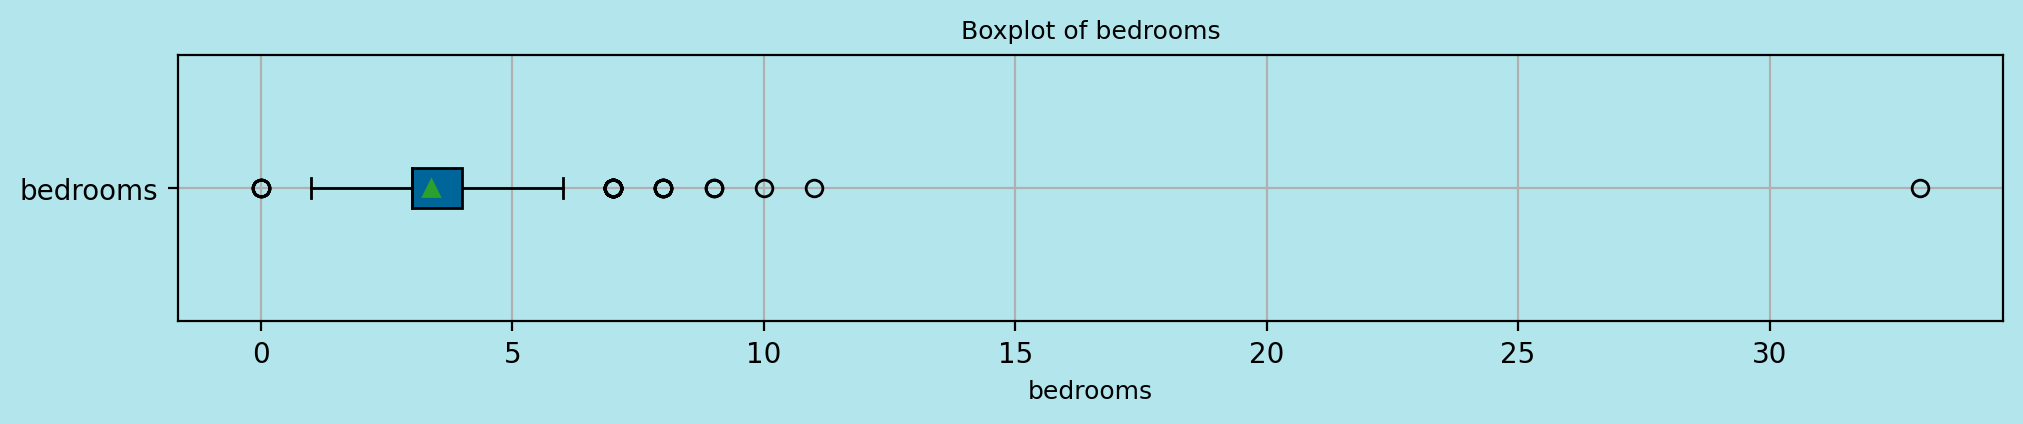

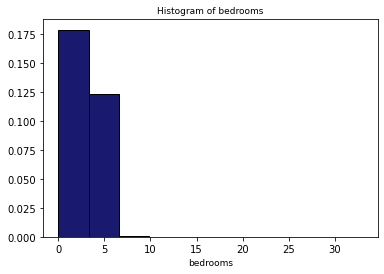

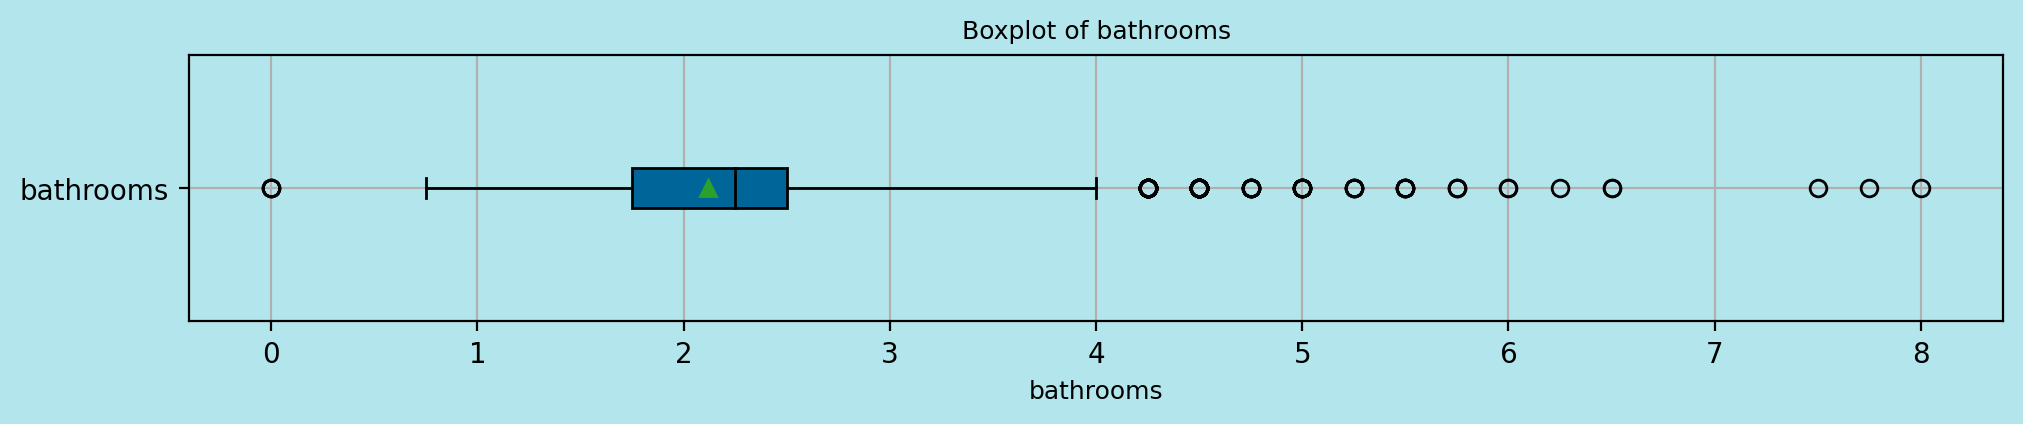

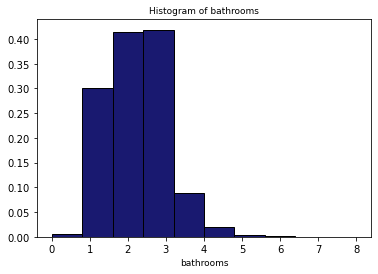

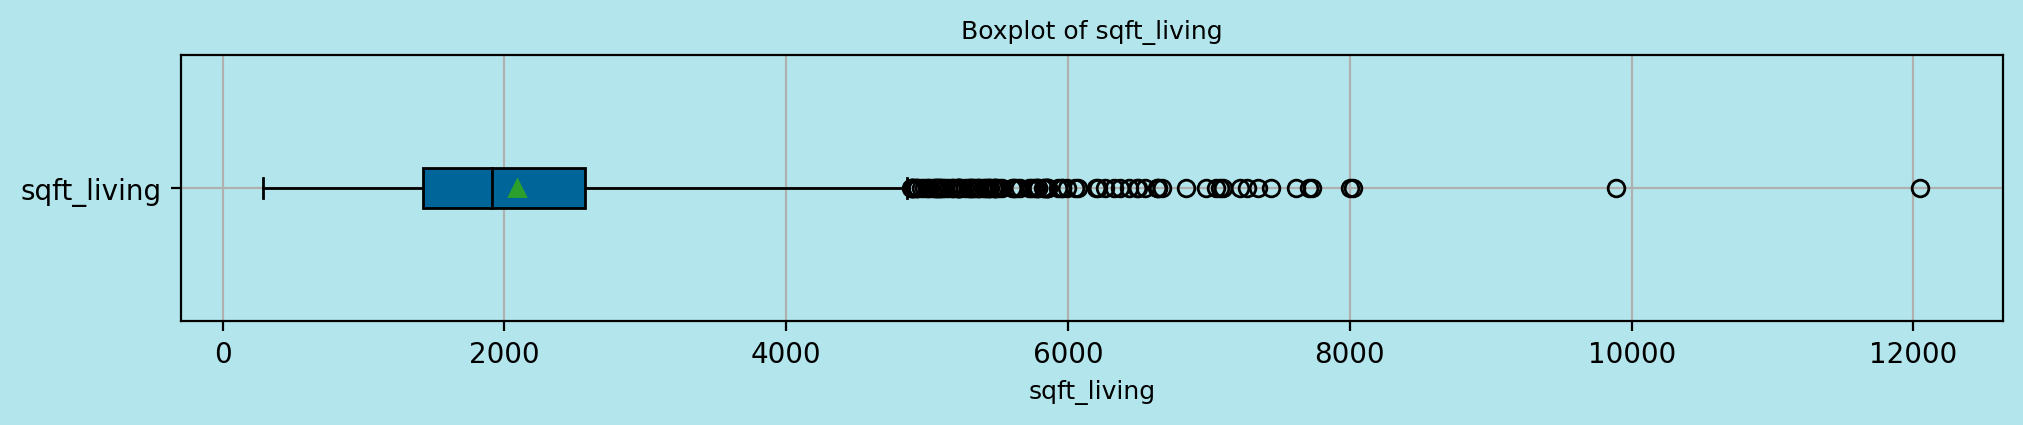

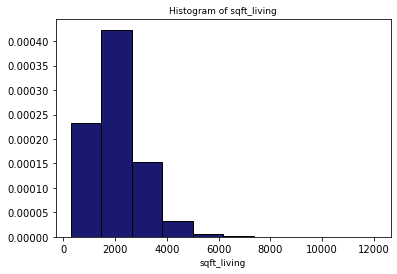

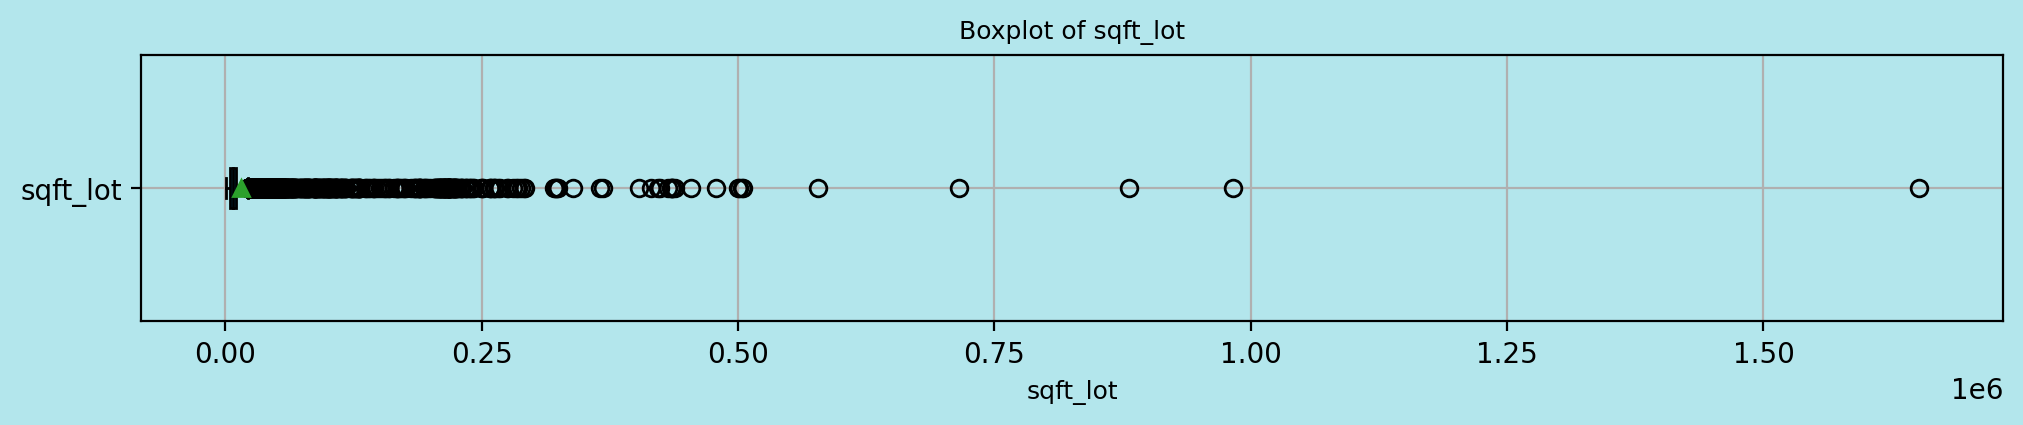

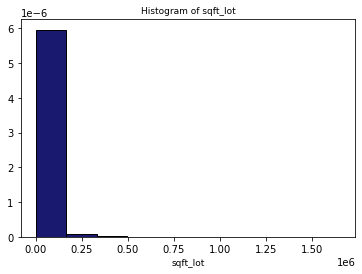

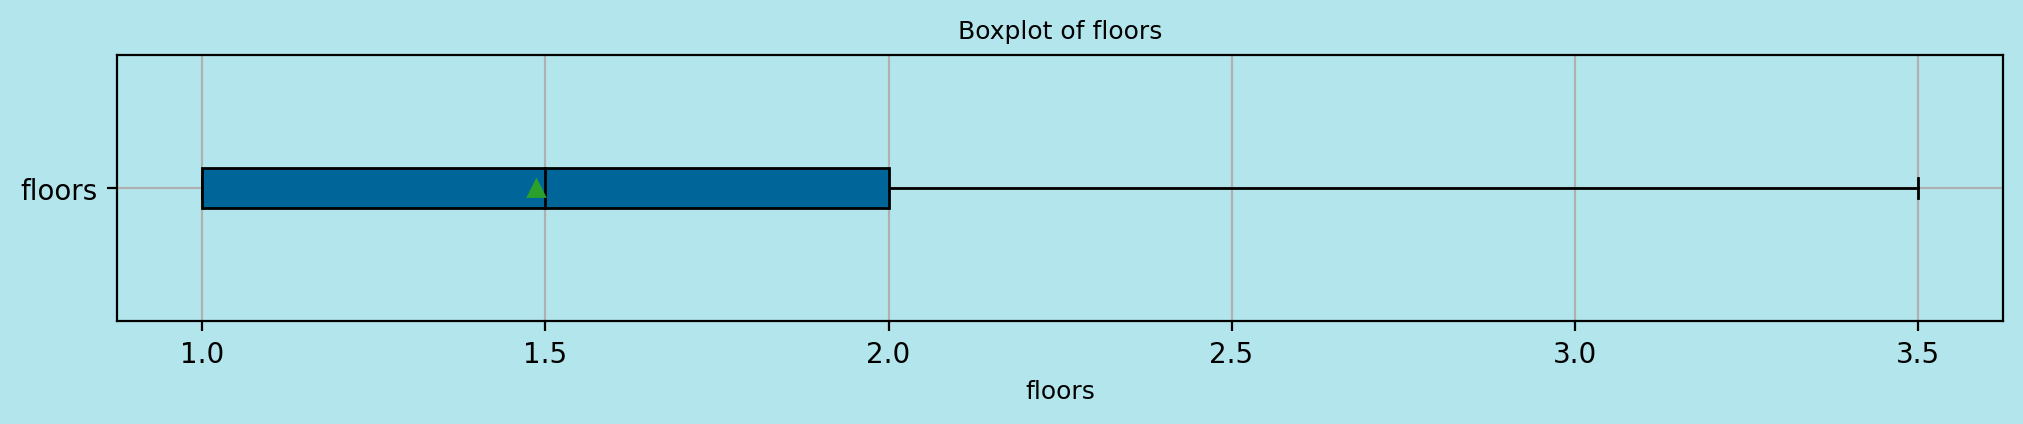

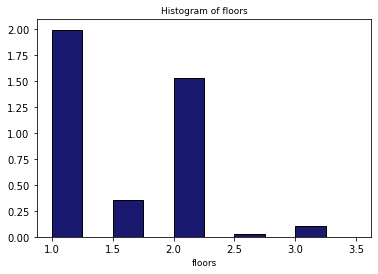

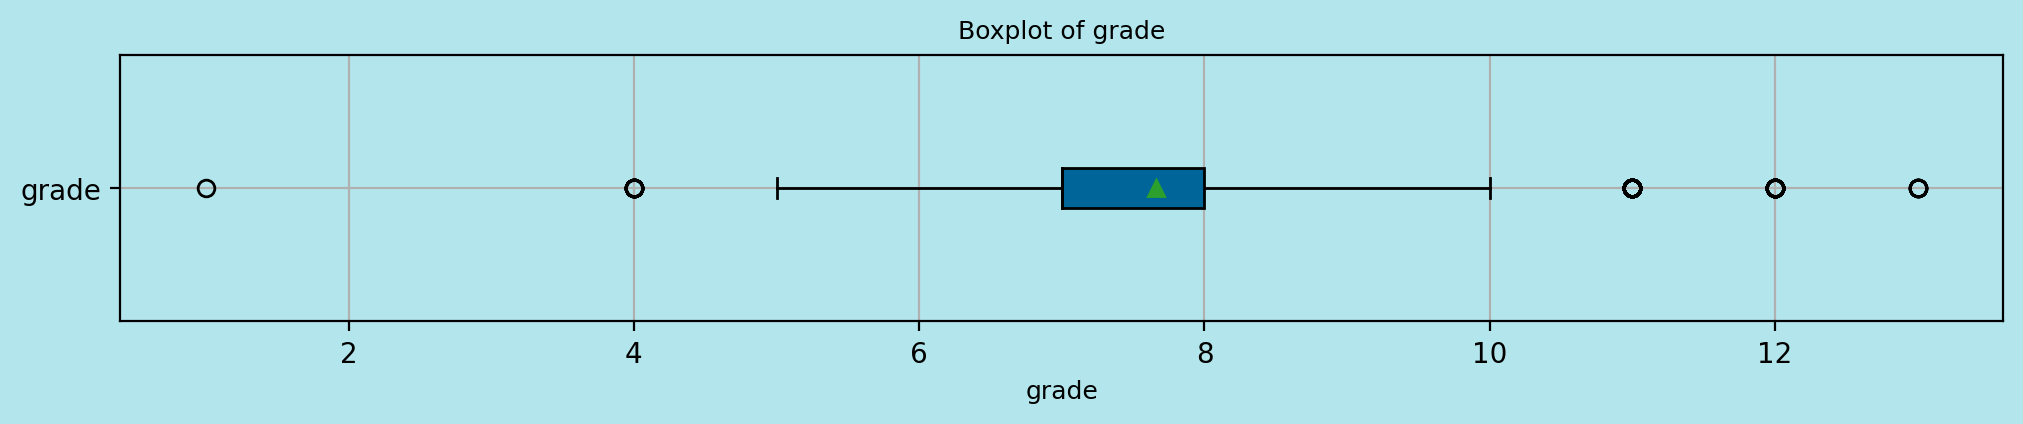

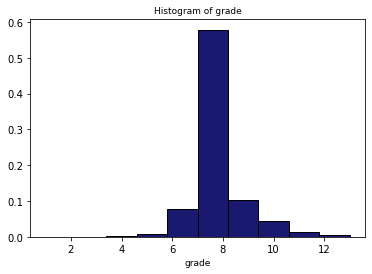

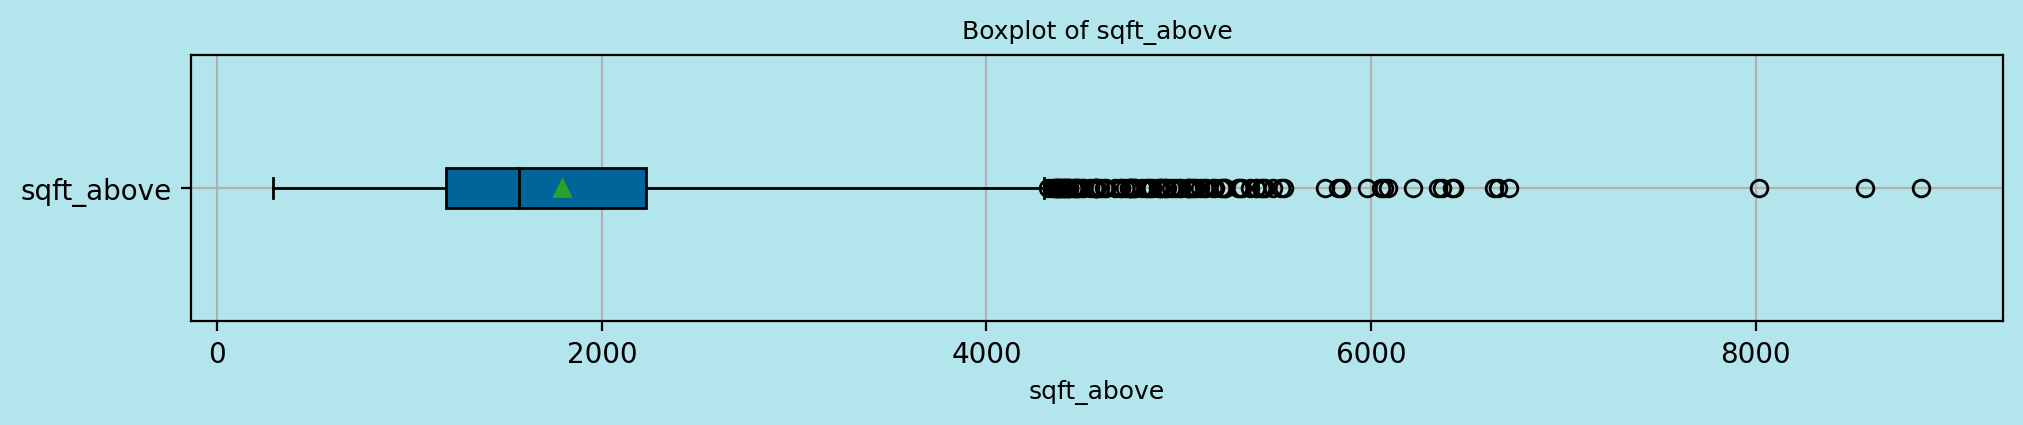

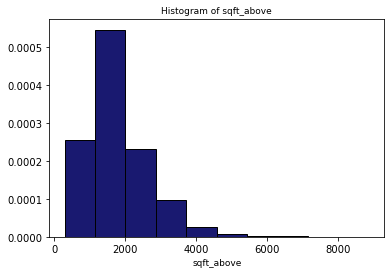

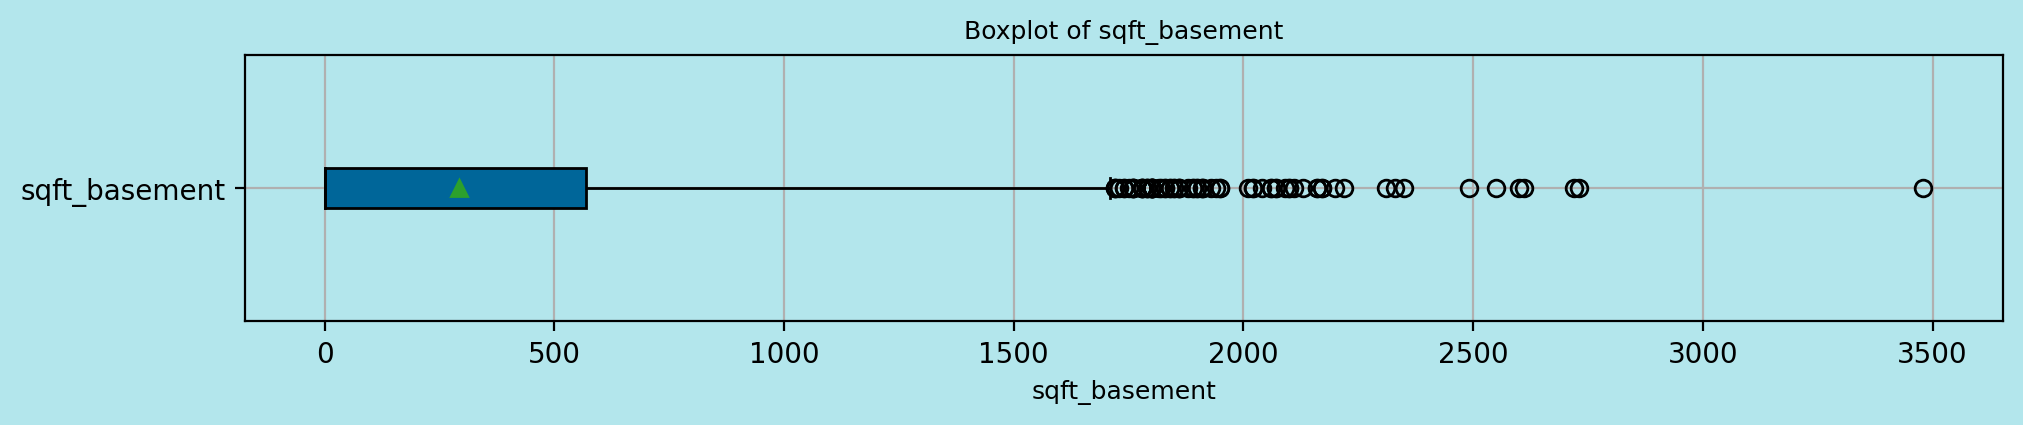

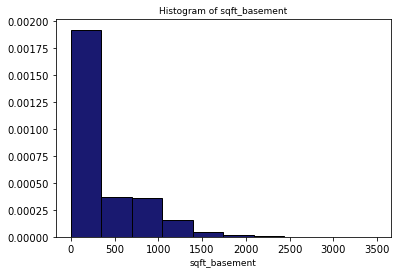

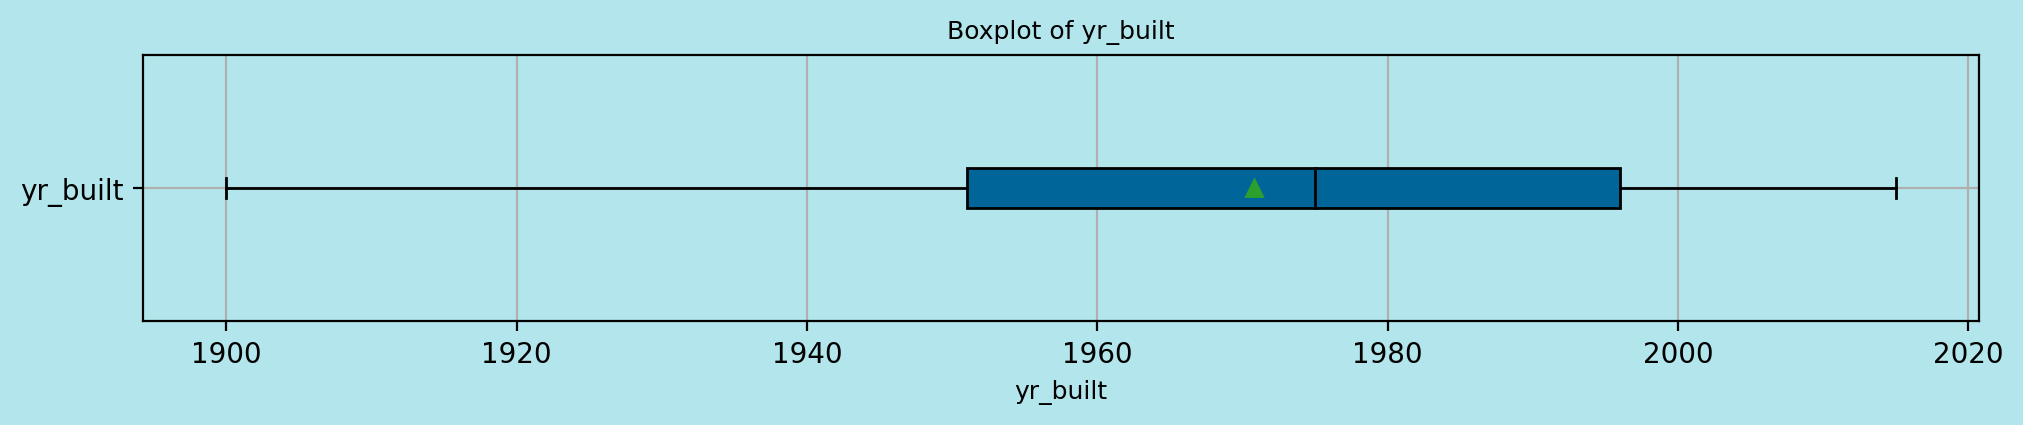

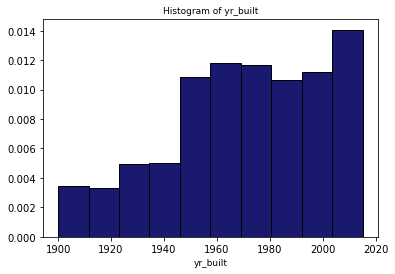

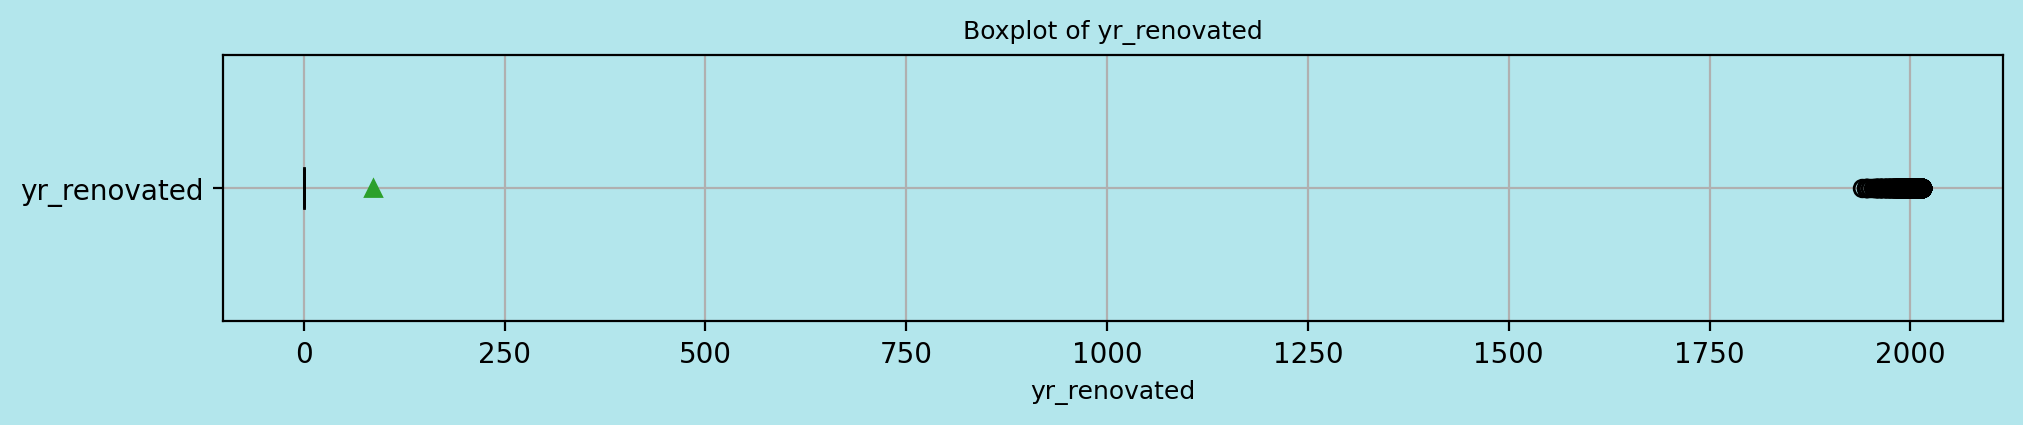

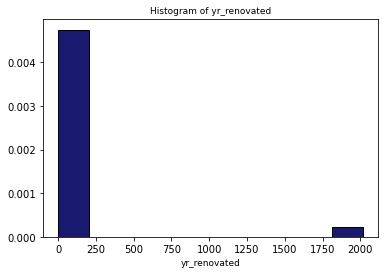

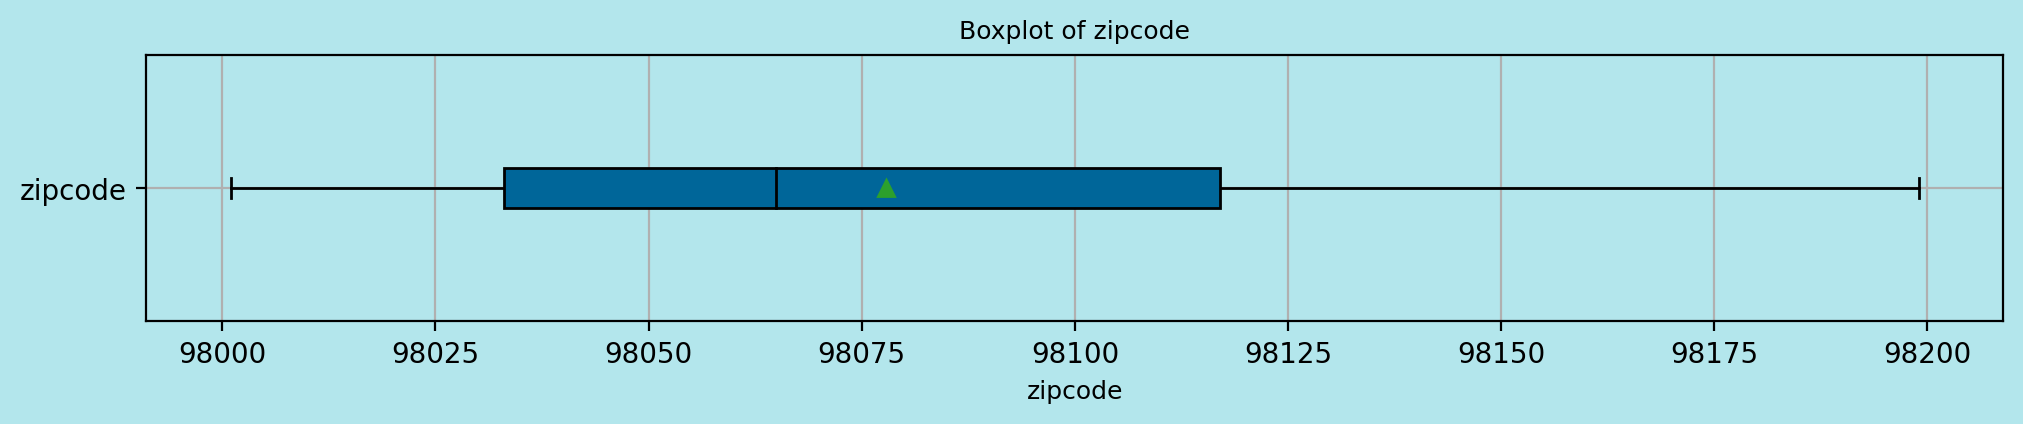

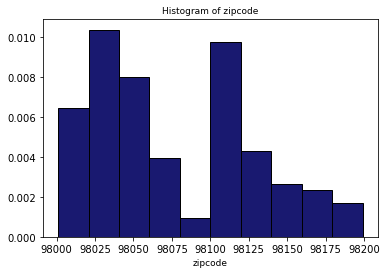

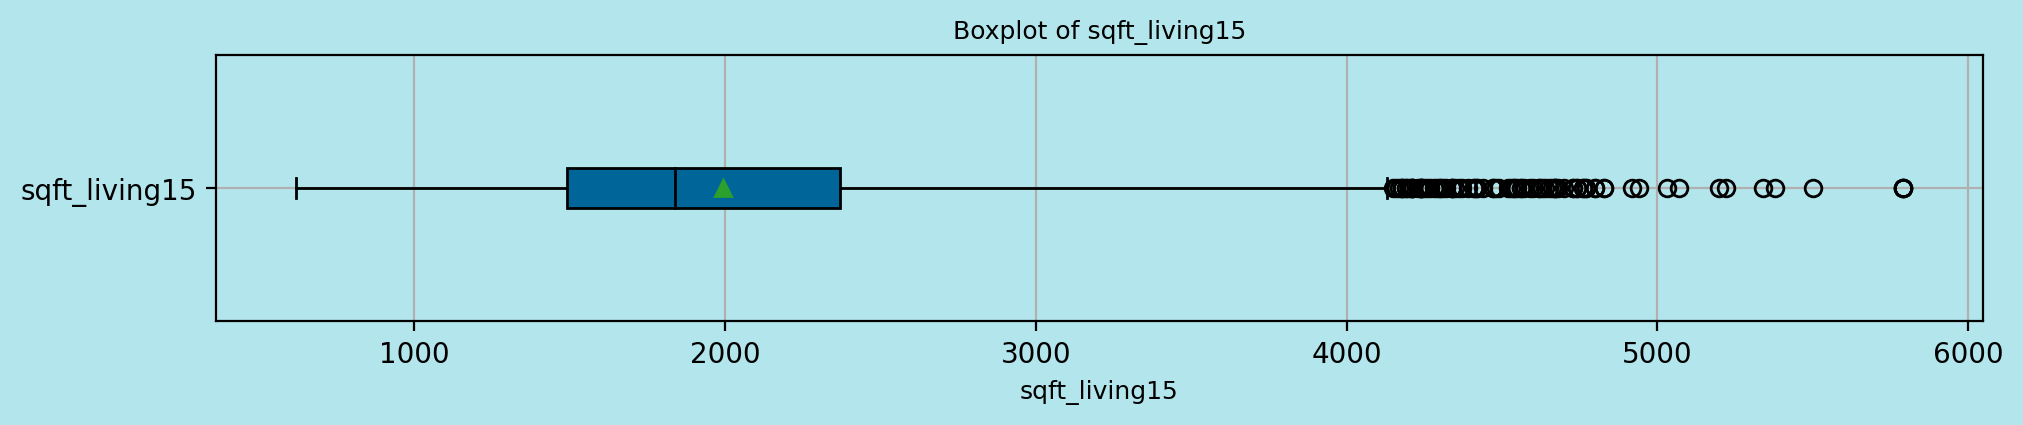

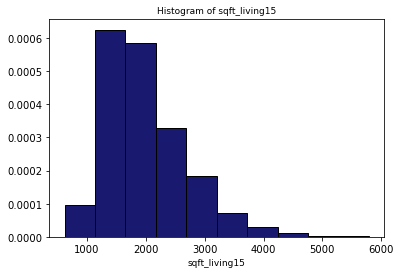

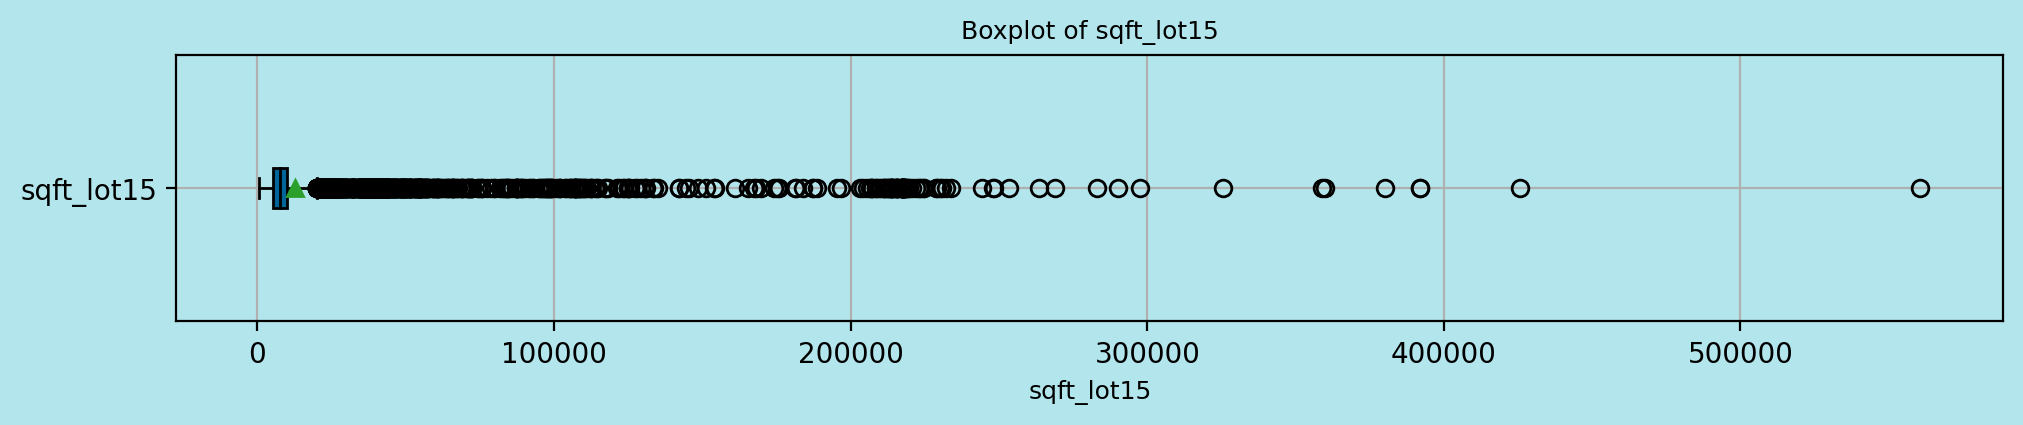

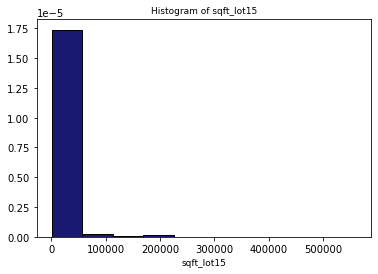

In [11]:
#We are using the graph we created for our final python assignment
import os
os.chdir("/Users/aanchalkhanna72/Desktop/Praxis/Term 2/AML/KC House Price Pred/") #this file and graphsave file shsould be in the same directory 
from graphsave import *
Graph_v5(data)

### UNIVARIATE SUMMARY

9761 houses were sold in King County between the year 2014-15. Majority of the houses sold were not waterfront properties and had an adequate view. The average price of a house was  $542,735 with a large  variability in prices.  The median price was less  than  the mean price which indicated a right skew of price distribution. In other words, most of the house prices lay on the lower end of the prices spectrum. On an avg, houses sold had 2 bathrooms, 1-1.5 floors (indicating presence of attic  space), a grade of 7.5 on a scale of 1-13 and a living area of 2100 sq ft. Most houses didn't have basements.

75% of the houses had a living area less than 2570 sq ft, but alarmingly, the remaining 25% of the houses had a living  area between a wide range of 2570-12050 sq ft. There were many anomalies in the characteristics of the houses, which indicated either incorrect data collection or presence of outliers that were skewing the information we were seeing. The average lot size for houses was about  15000 sq ft, the minimum being 520 sq ft. 75% of the houses had a lot size of  less than 10.5k sq ft. Due to the pressence of  outliers, the mean here was being pulled up to a higher number. According  to the latest data collection in  2015, the avg lot size of the houses sold decreased from 2100  ssq ft to  1992 sqft for all quartiles. The oldest house was built in 1900 whereas the most recent house was built in 2014. 


#### SCOPE: QUESTIONS FOR BIVARIATE AND MULTIVARIATE ANALYSIS
1. Which pincode(lat/long) has the highest/lowest price?
2. Given that the number of bedroooms is 3 (avg)/lot size is 7642 sq ft(avg)/floors  is 1.5 (individually), what are the different house prices?
3. Year  built vs price  increase. Is there a premium to  be paid  by buyer  for older houses considering the architecture? See Heritage Homes
4. Price difference of Renovated  homes (code renovated  homes as 0-not renovated,1-renovated)
5. How are grades  determined? (linear regression can be done  on grades  too) What is the impact of higher grades on prices? Do certain areas/zipcodes get better grades?
6. What to do with  outliers?
7. Mapping lat/long to check if houses are in vicinity? What are the amenities nearby - schools, libraries, grocery stores, malls, etc.?
8. Check for  multicollinearity: condition, renovation; sqftliving:bedrooms
9. Check for Correlation: a. Basements and prices as basement usually has many amenitiess, home theatre,etc., 10. yr.built, zipcode, prices (some areas have more  heritage homes) relationship


###  Experiment:  Bivariate Analysis

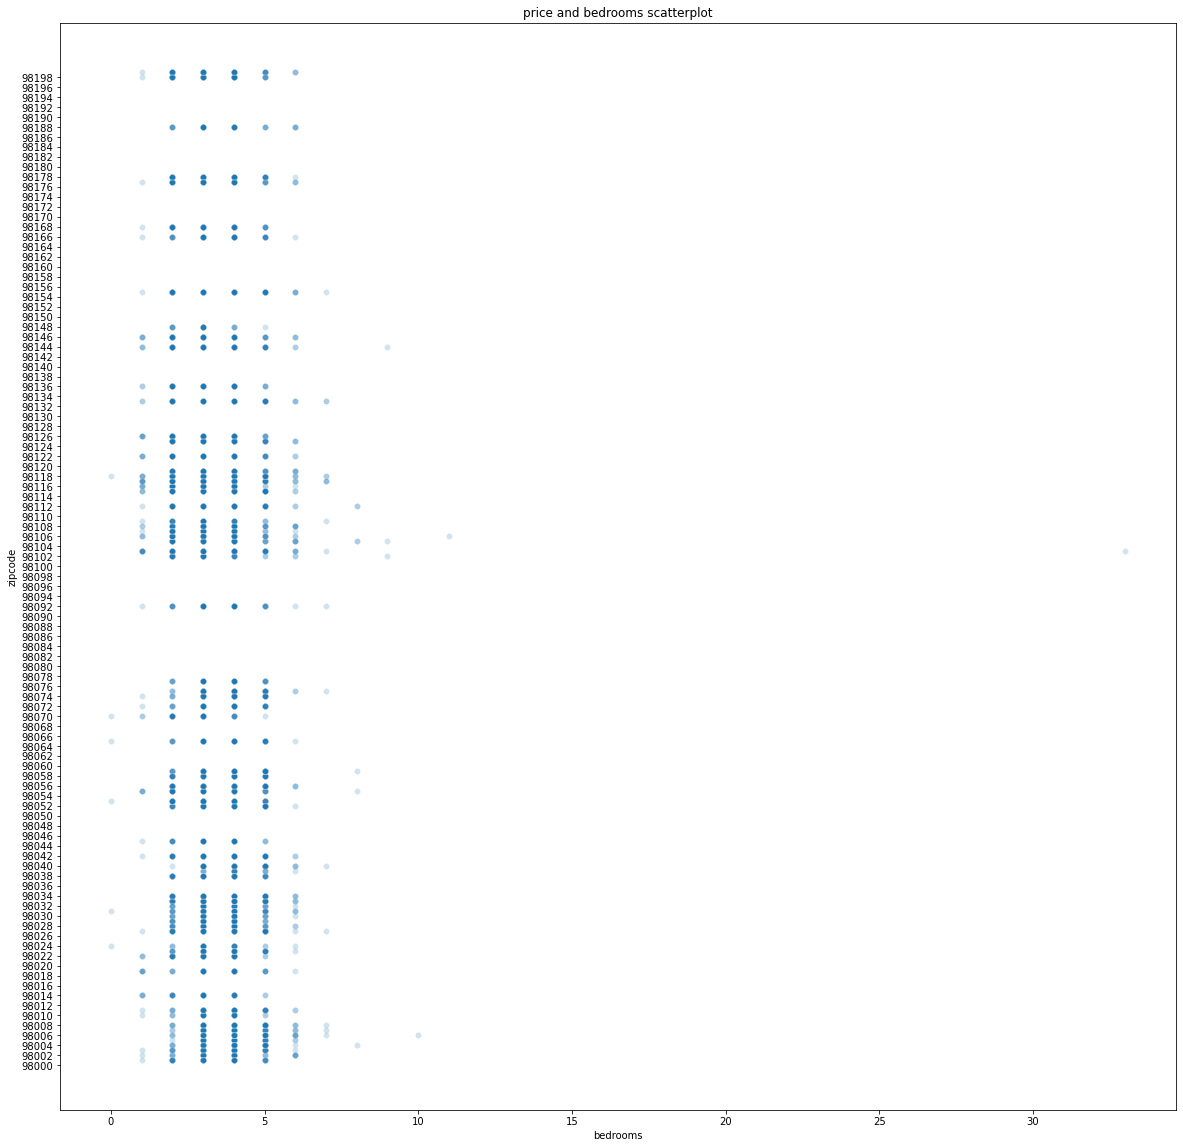

In [12]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='bedrooms', y='zipcode' , data=data,alpha=0.20)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('price and bedrooms scatterplot')
#plt.savefig('zipcode-vs-price-scatter.png')
plt.show()

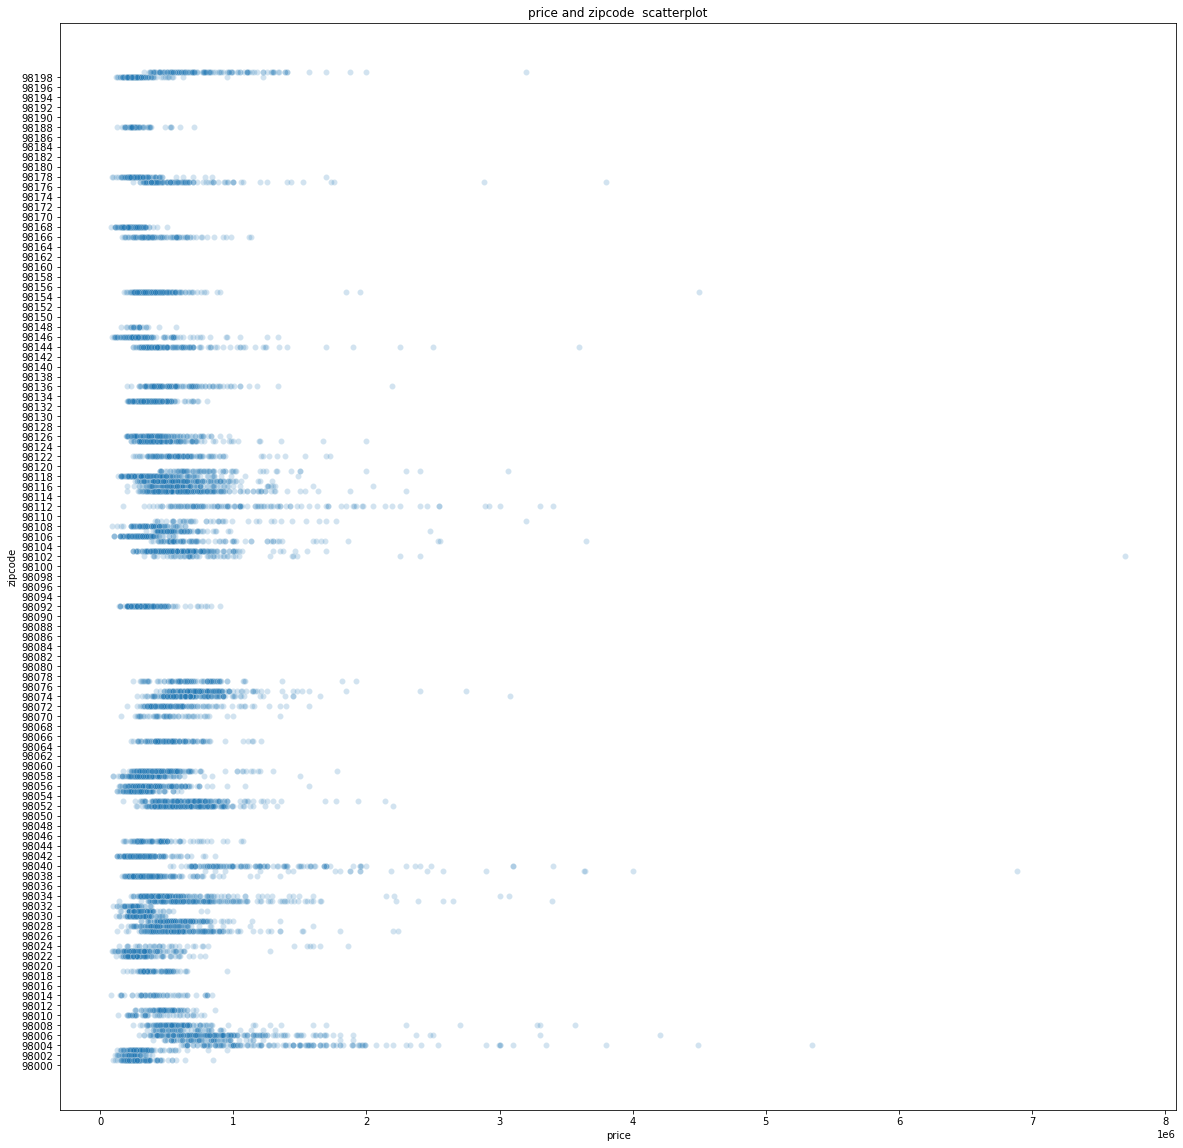

In [13]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='zipcode' , data=data,alpha=0.20)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('price and zipcode  scatterplot')
#plt.savefig('zipcode-vs-price-scatter.png')
plt.show()

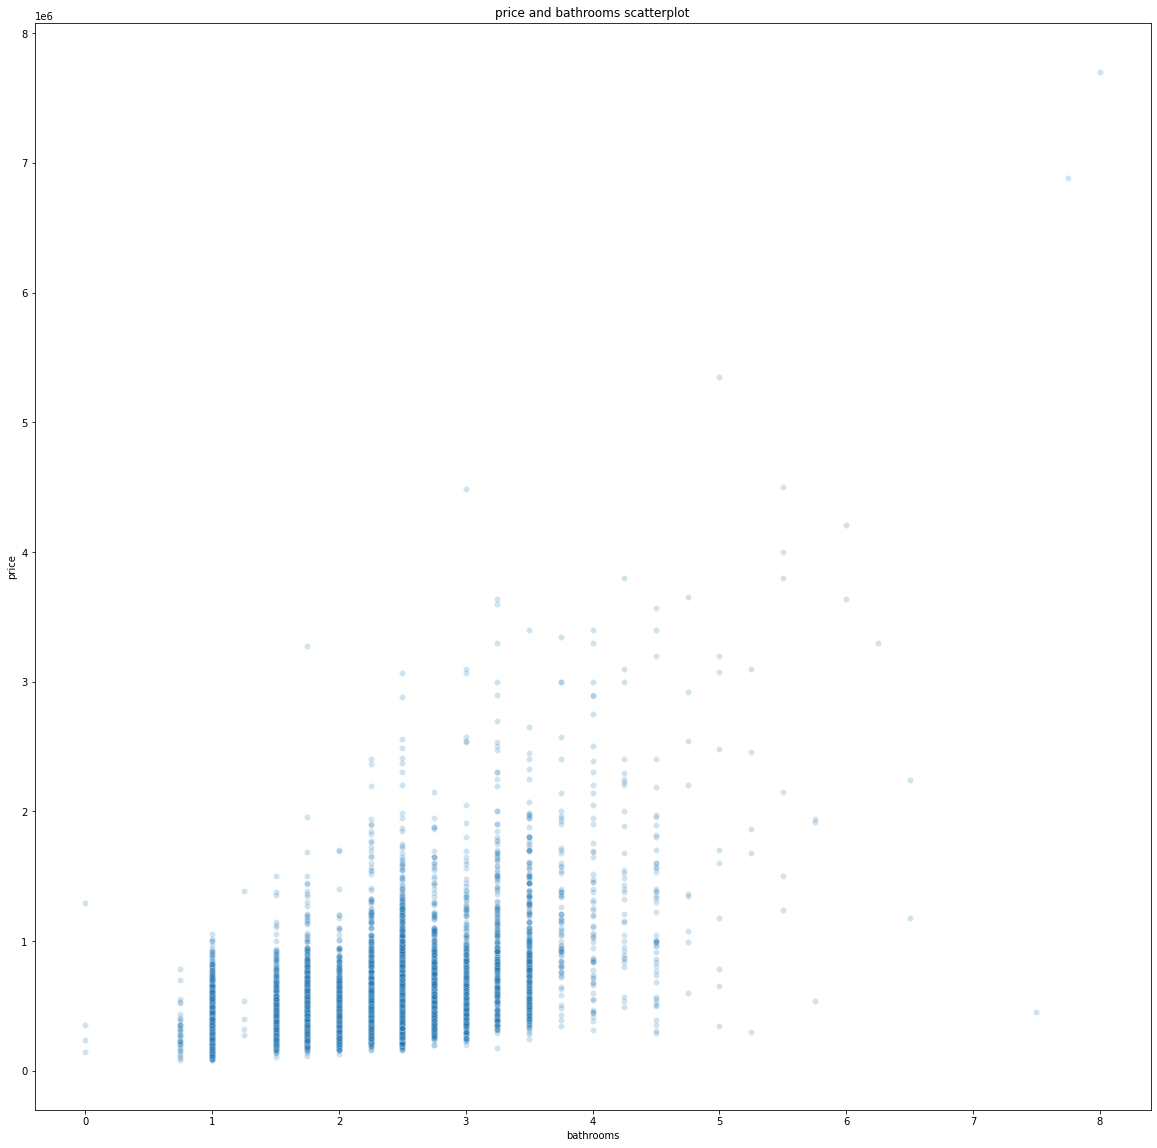

In [14]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='bathrooms', data=data,alpha=0.20)
plt.title('price and bathrooms scatterplot')
plt.show()

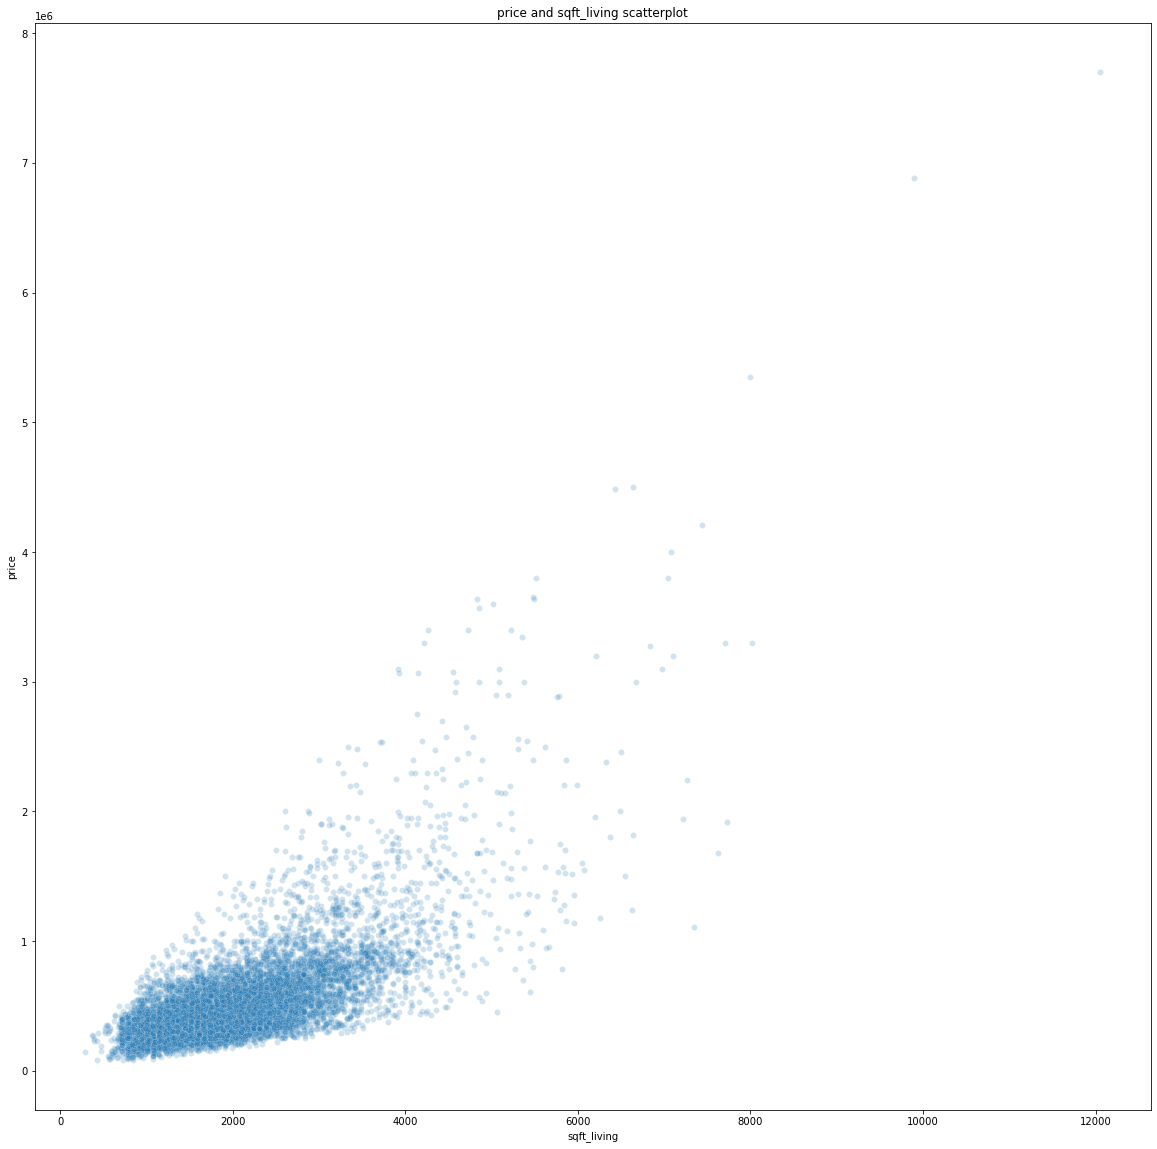

In [15]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='sqft_living', alpha=0.20, data=data)
plt.title('price and sqft_living scatterplot')
plt.show()

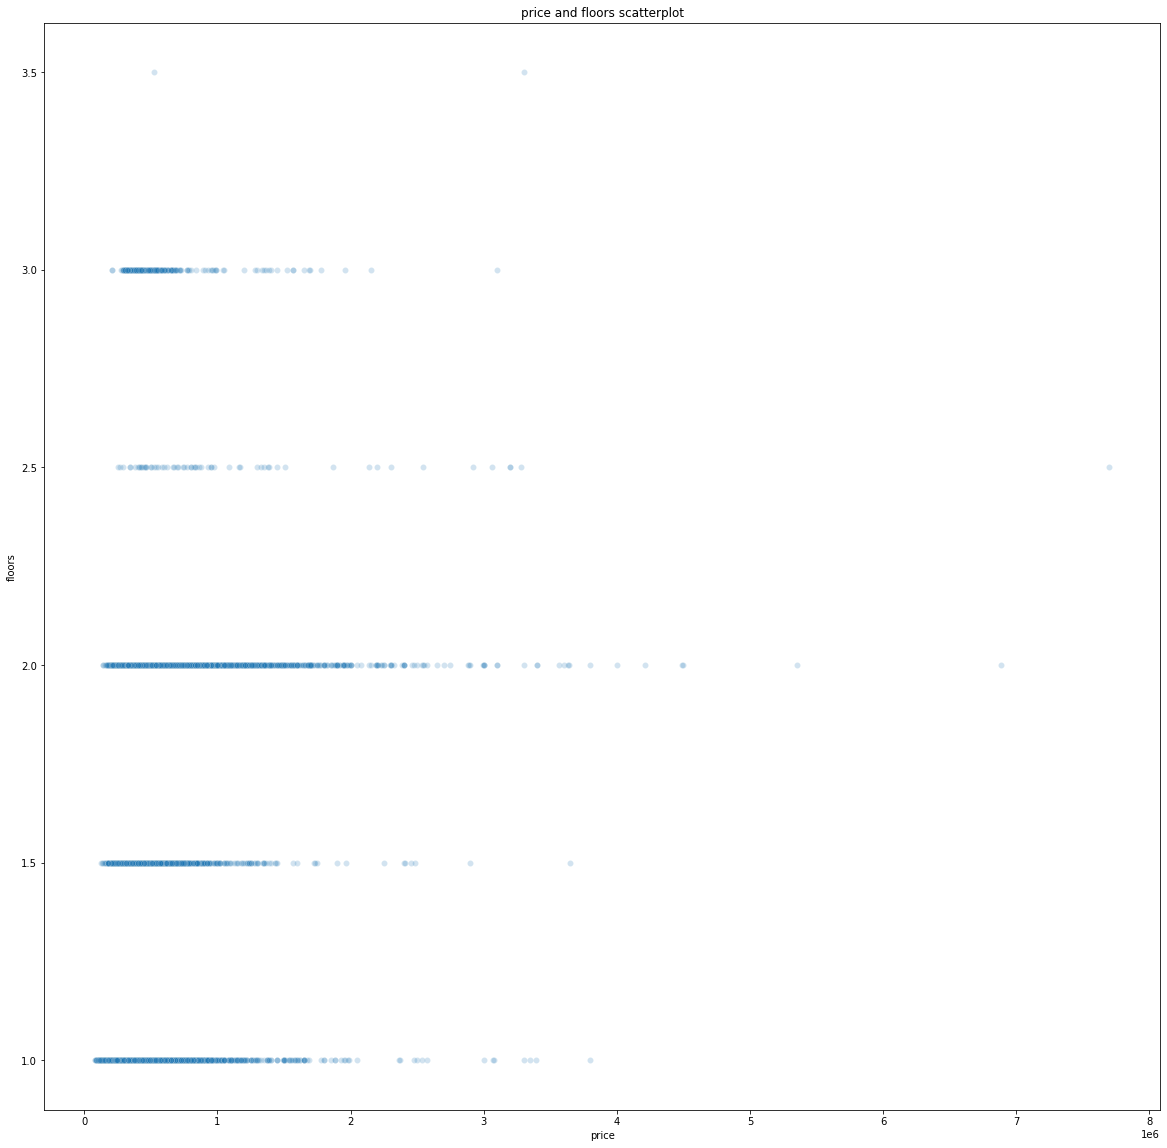

In [16]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='floors' , data=data,alpha=0.20)
plt.title('price and floors scatterplot')
plt.show()

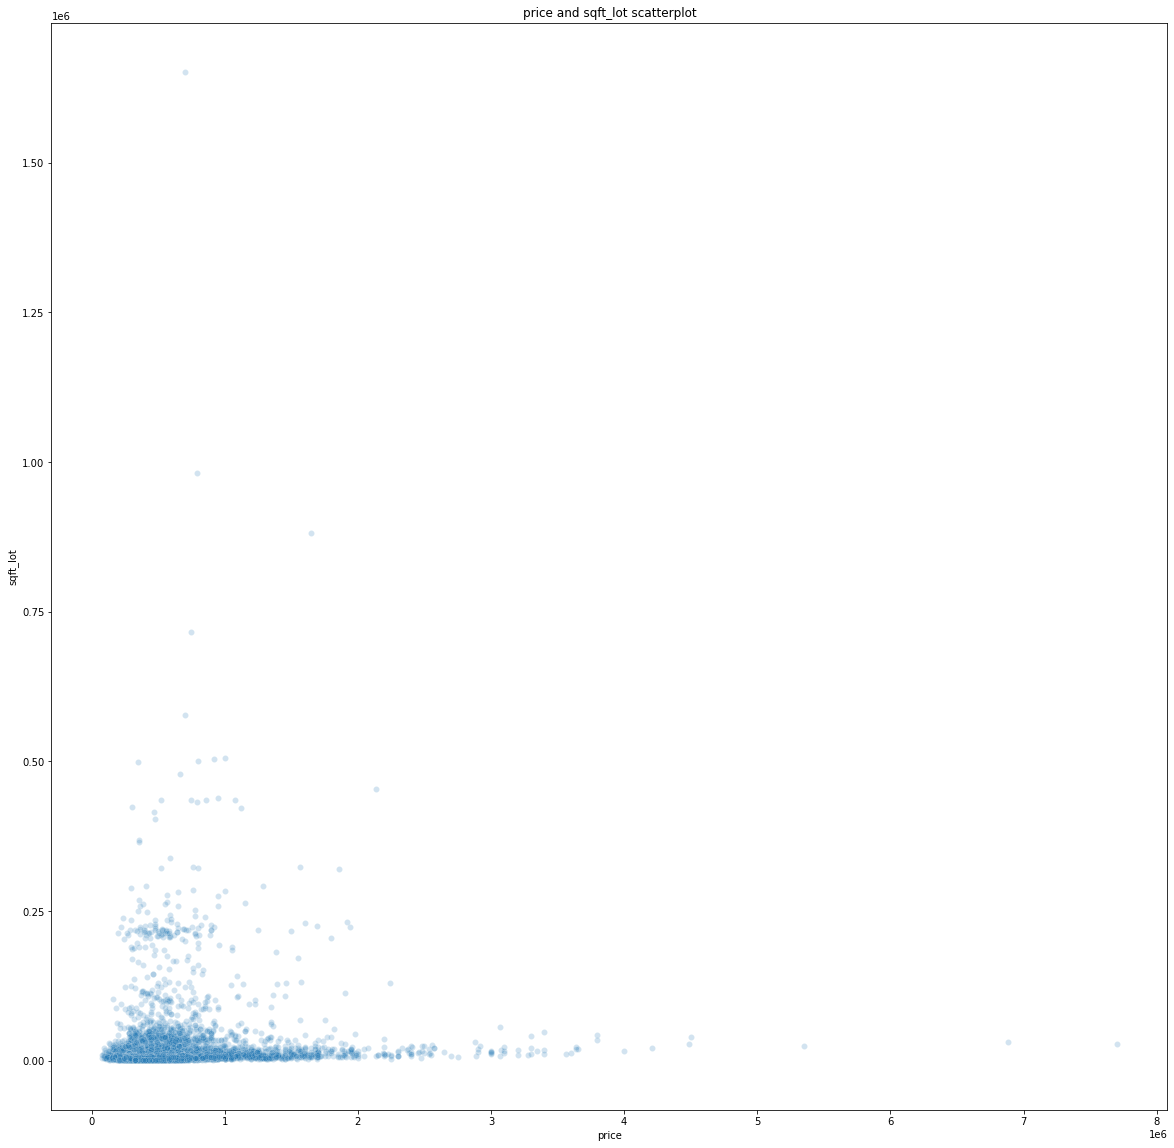

In [17]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y=data.sqft_lot, data=data,alpha=0.2)
plt.title('price and sqft_lot scatterplot')
plt.show()

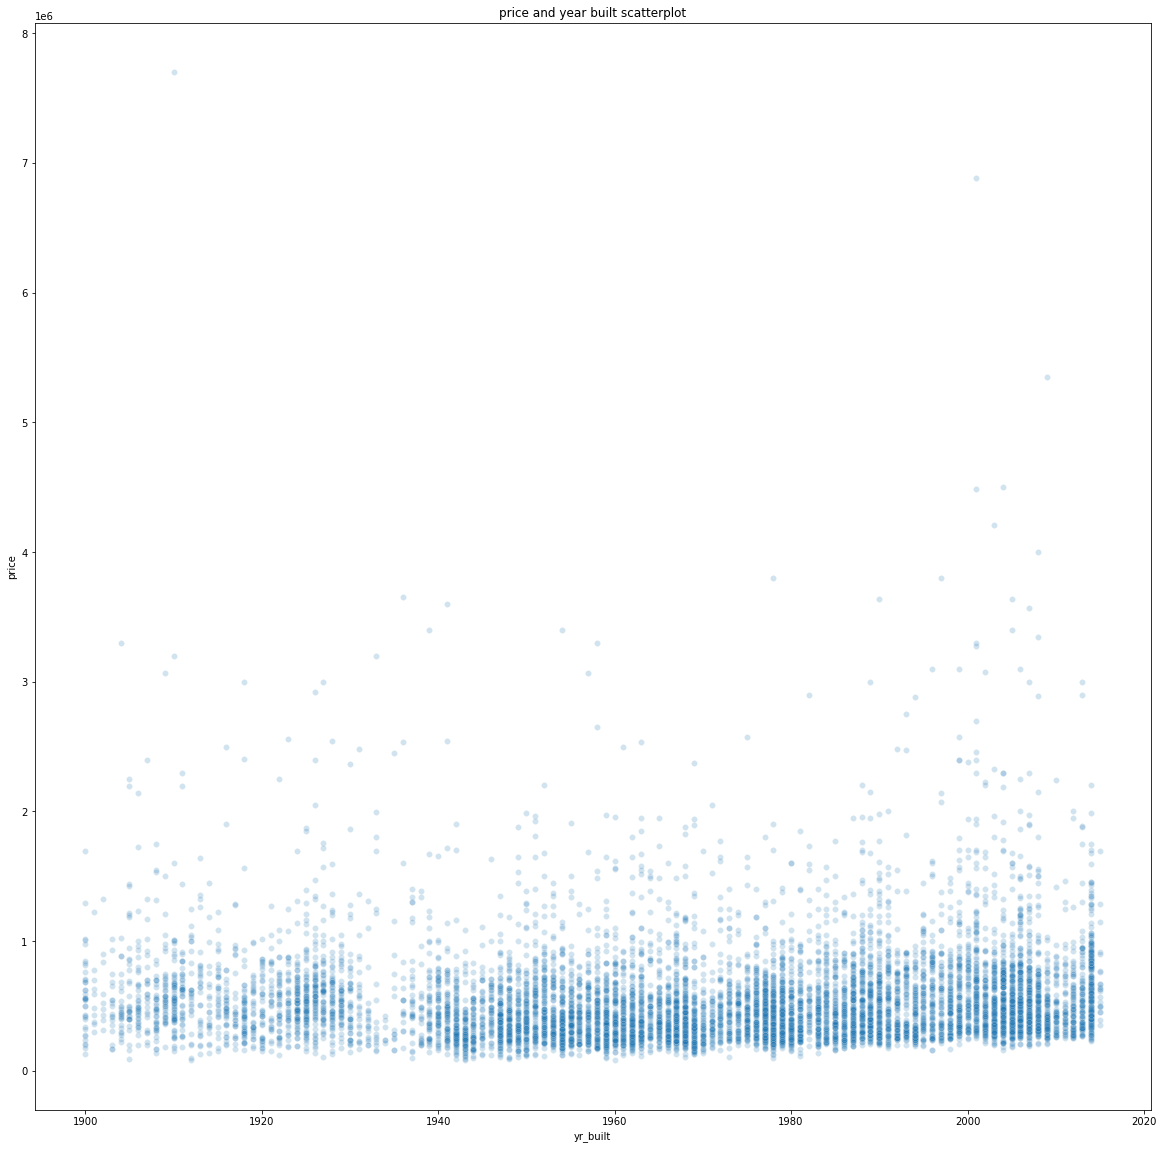

In [18]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='yr_built',data=data,alpha=0.20)
plt.title('price and year built scatterplot')
plt.show()

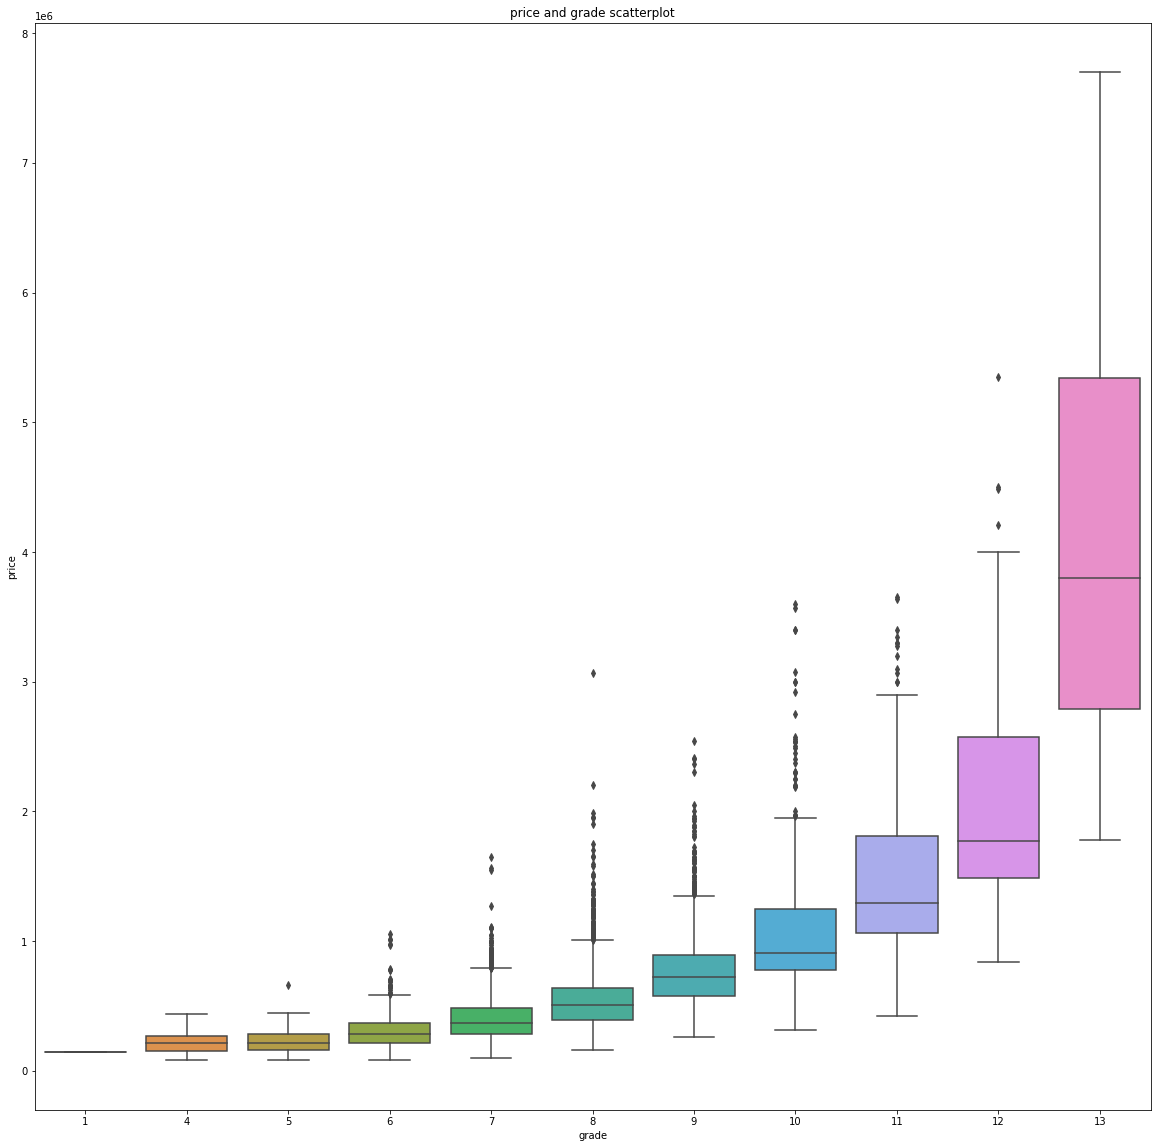

In [19]:
plt.figure(figsize=(20,20))
sns.boxplot(y='price',x='grade' , data=data)
plt.title('price and grade scatterplot')
plt.show()

In [20]:
#creating a new variable "house_age" 
house_age= 2015 - data['yr_built']

In [21]:
data.insert(18, 'house_age', house_age, True)

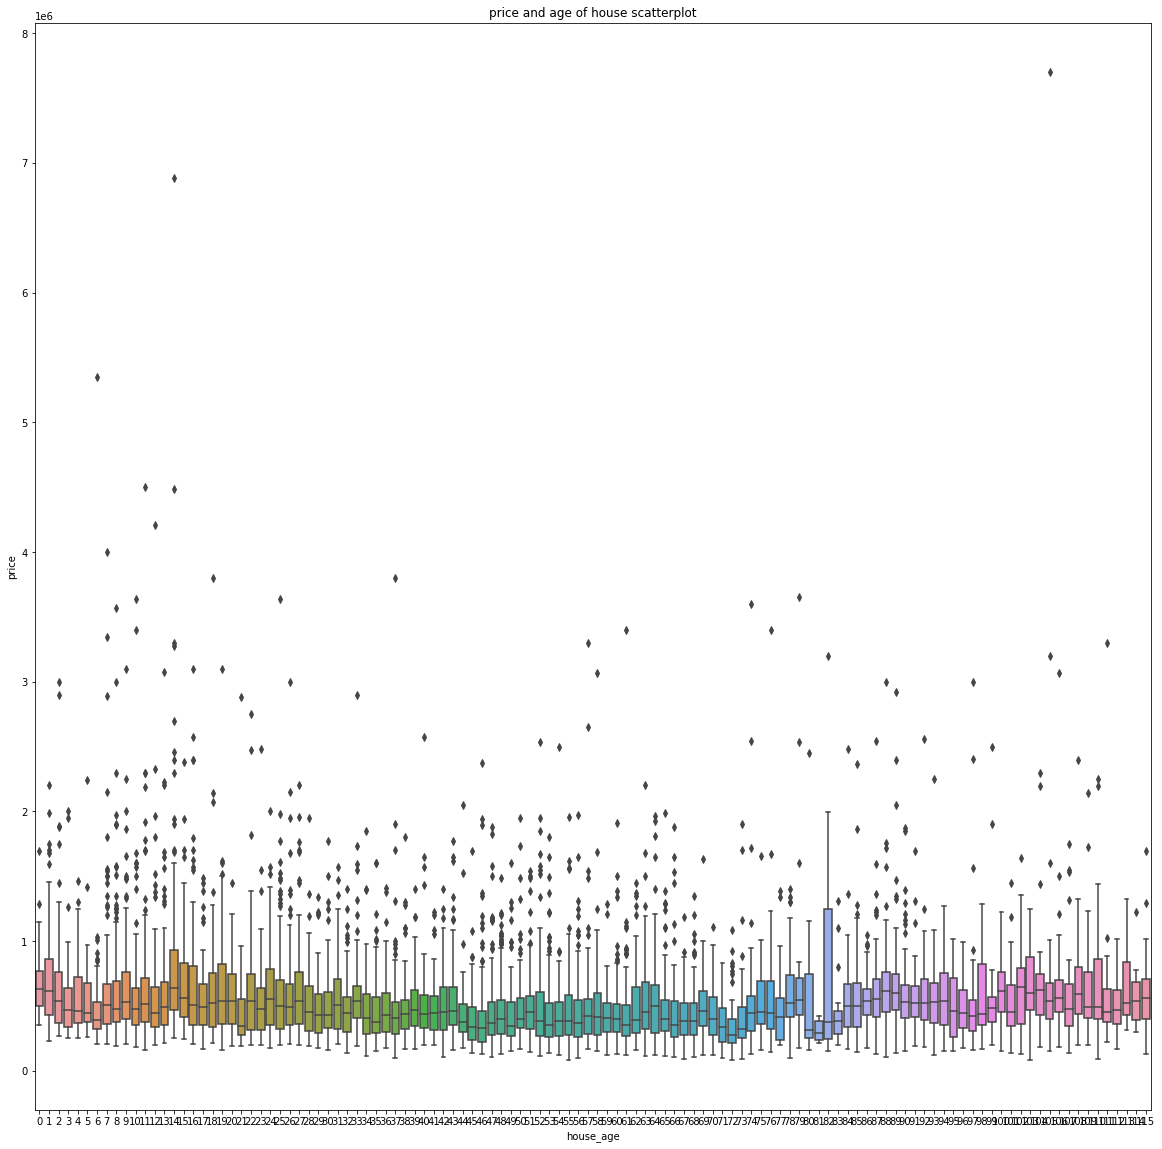

In [22]:
plt.figure(figsize=(20,20))
sns.boxplot(y='price',x='house_age' , data=data)#, alpha=0.2)#can be binned
plt.title('price and age of house scatterplot')
plt.show()

<AxesSubplot:>

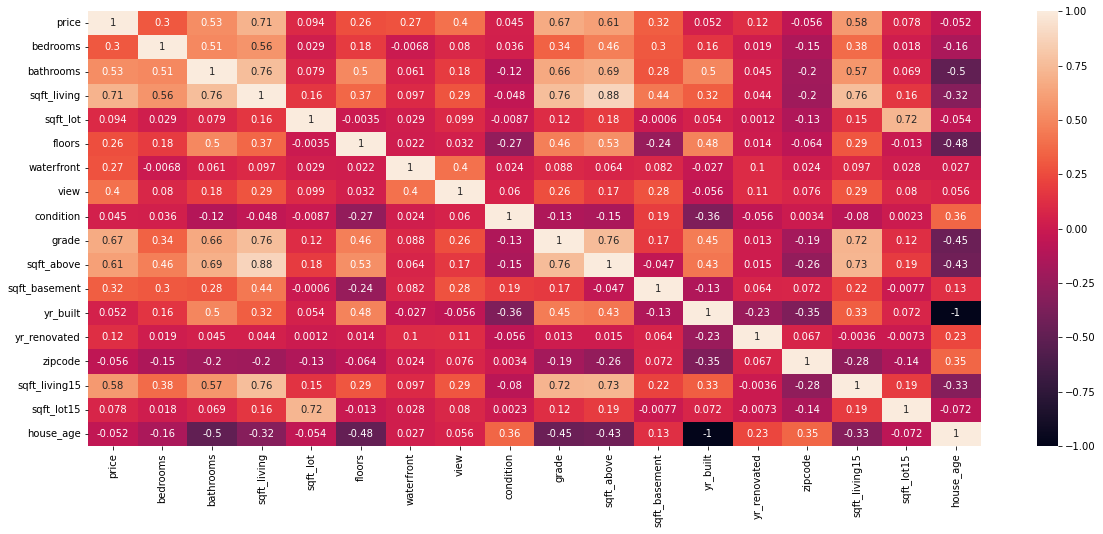

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

### BIVARIATE SUMMARY 
**ANSWERS TO QUESTIONS FOR BIVARIATE AND MULTIVARIATE ANALYSIS:**
1. Which pincode(lat/long) has the highest/lowest price?

Certain pincodes are associated with higher price range whereas some are associated with lower prices. The latter  category has lower variability and more consistent observations, whereas zipcodes with highly priced houses have more variability. 

2. Do prices increase as number of rooms/bathrooms increases? Given that the number of bedroooms is 3 (avg), what are the different house prices?
Surprsingly, no. We notice that these two  variables have a low (linear) correlation of 0.30. Additionally, when we plotted a scatterplot for price and beddrooms, we noticed that for given number of bedrooms, there was a large  vavriability in prices. Some  outliers are present with high number of bedrooms but low prices, which is intriguing. 

On the other hand, bathrooms and  prices have a higher correlation of 0.52. Even in our boxplot, we are  able to notice that there is a ladder-like trend, inddicating that as number of bathrooms increase,  the price range also begins to increase. 

3. Given that the living size is 2100 sq ft(avg), what are the different house prices? 
As  hypothesized, there  is a  strong correlation between house prices and sqft living space. This is also visible in the scatterplot where prices seem to increase slowly (flatter slope) as sqft_living increases. There is less variability in prices at 2100 sq ft,  i.e., prices are in the lower range for these houses. 

4.  Correlation between lot size and prices
Contrary to our hypothesis, there is a really low, almost negligible, linear correlation between lot sizes and prices. This is counter-intuitive as our understanding was that  houses  with bigger lot sizes would cover more sqft area and therefore have higher prices. Perhaps this is dependent on other factors such as zipcode. 

5. Year  built vs price  increase. Is there a premium to  be paid  by buyer  for older houses considering the architecture? See Heritage Homes

To assess this, we created a variable called house_age which is the difference betweem 2015 and the year built. Our hypotheses is disproved as older houses aren't associated with higher prices. In fact, a small number of newer, modern houses are associated with higher prices, however, these could just  be outliers.  

6. Price difference of Renovated  homes (code renovated  homes as 0-not renovated,1-renovated)
Looking at average prices of renovated houses and non-renovated  houses in Excel, we find that the average price  of renovated  homes is higher (about 650k vs. 500k). We will be categorizing these into dummy variables during feature engineering.

7.  What is the impact of higher grades on prices? Do certain areas/zipcodes get better grades?
There is a high correlation between grades and prices (0.66). Higher grades are related with higher  prices. We cannot read  the correlation coeffiecient for zipcode and grades,  as the zipcode data is being read as numerical data.

8. Does having a waterfront increase  the price of the home?
Surprisingly,no. There is low correlation between prices and presence of waterfront.  


9. Check for  multicollinearity: condition, house_age; sqftliving:bedrooms
a.condition, house_age: low correlation (0.35)
b.sqftliving:bedrooms: moderately correlated (0.56)

10. Check for Correlation: 
a. Basements and prices (as basement usually has many amenitiess, home theatre,etc.): low correlation (0.30)
b. house_age, zipcode: unable to say as zipcode can't be handled numerically


### Experiment: Data Cleaning before Model Fittinng

As observed earlier, we found many outliers across the features, however, we chose to keep the outliers as they were large in number, and hence did not indicate incorrect data collection. However, there were a few observations  that we cleaned up as they had values which did not seem plausible considering its other features. For instance, there was a  house with  33 bedrooms with 1620 sqft  of living space and 6000 sqft  lot space. It had 1.75  bathrooms. Its other features (highlighted below) seem plausible so we decided to correct the bedrooms to 3  (Which is also  the  average number in our dataset).

In [24]:
#updating bedroom values for outliers/anomalies with average bedrooms
data[data.bedrooms==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,house_age
7204,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700,68


In [25]:
#updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data.at[7204,'bedrooms'] = 3

In [26]:
data.at[7204,'bedrooms']

3

In [27]:
#updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data[data['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,house_age
2228,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,2170,6000,62
3177,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,25
4472,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,25
4507,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,19
8338,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,1920,224341,12
8840,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850,52


In [28]:
data.at[[8840,8338,2228,3177,4472,4507],'bedrooms'] = 3

In [29]:
data.at[[8840,3177,4472,4507],'bathrooms'] = 2

In [30]:
data.iloc[[8840,8338,2228,3177,4472,4507]]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,house_age
8840,20140926T000000,142000.0,3,2.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850,52
8338,20141029T000000,265000.0,3,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,1920,224341,12
2228,20141002T000000,228000.0,3,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,2170,6000,62
3177,20140624T000000,1295650.0,3,2.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,25
4472,20150429T000000,355000.0,3,2.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,25
4507,20141223T000000,235000.0,3,2.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,19


In [31]:
data.iloc[[8840,3177,4472,4507]]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,house_age
8840,20140926T000000,142000.0,3,2.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,1620,22850,52
3177,20140624T000000,1295650.0,3,2.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,4740,35061,25
4472,20150429T000000,355000.0,3,2.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,2520,8050,25
4507,20141223T000000,235000.0,3,2.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,1060,7200,19


In [32]:
np.mean(data[data['bathrooms']==0.75])

/Users/aanchalkhanna72/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


price            307155.405405
bedrooms              2.027027
bathrooms             0.750000
sqft_living         884.486486
sqft_lot          18798.513514
floors                1.094595
waterfront            0.081081
view                  0.486486
condition             3.567568
grade                 5.594595
sqft_above          836.918919
sqft_basement        47.567568
yr_built           1945.594595
yr_renovated        161.081081
zipcode           98085.486486
sqft_living15      1461.621622
sqft_lot15        24706.918919
house_age            69.405405
dtype: float64

In [33]:
np.mean(data[data['bathrooms']==1])

price            344478.649052
bedrooms              2.631246
bathrooms             1.000000
sqft_living        1167.803561
sqft_lot          12287.309592
floors                1.108558
waterfront            0.002872
view                  0.105686
condition             3.454337
grade                 6.567490
sqft_above         1089.213670
sqft_basement        78.589891
yr_built           1944.414130
yr_renovated         67.234922
zipcode           98100.546238
sqft_living15      1450.147616
sqft_lot15        10449.454911
house_age            70.585870
dtype: float64

In [34]:
#updating to 2 rooms as the avg bedrooms of houses with 1 and 0.75 bathrooms are 2.63 and 2.02 respectively
data.at[[8338,2228],'bedrooms']=2

In [35]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'house_age'],
      dtype='object')

### Experiment: Initial Decision Tree Model Fitting Step (without Feature engineering)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error 
from  sklearn import tree

#### Trial Model 1

In [58]:
#We chose these variables because they had highest correlation with house prices 
X_train=data[["sqft_living","grade","bathrooms"]]
y_train=data[["price"]]

In [59]:
# Train-Validate Split

In [60]:
#function test-train split
from sklearn.model_selection import  train_test_split

In [61]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size=0.25)

In [62]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(7320, 2441, 7320, 2441)

In [63]:
# Fitting a Regression tree Model

In [64]:
#Set up model
reg_tree=DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [65]:
y_pred=reg_tree.predict(X_valid)
y_train_pred=reg_tree.predict(X_train)

In [66]:
y_valid=np.array(y_valid)

In [67]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model1.jpeg')
#plt.show()

In [68]:
# Calculating Error metrics (RMSE, MAPE)

In [69]:
#training error
mean_absolute_percentage_error(y_train,y_train_pred)

0.3186627169260732

In [84]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_valid - y_pred)**2))

298291.9600263067

In [85]:
# MAPE (Mean Absolute Percentage Error)
#np.mean(np.abs(y_valid - y_pred)/y_valid)*100
mean_absolute_percentage_error(y_valid,y_pred)

0.31473704427013727

In [86]:
(np.mean(np.abs(y_valid - y_pred)/y_valid))*100

31.473704427013725

#### SCOPE: In this model, we notice that grades, sqft_living are the 2 variables where the first few splits take place. Most of the  stem nodes have  these  variables. The MAPE shows that  on  an average, the predicted values are away from the actual values by  29%.  We would like to add 2 new predictors 'sqft_lot','house_age', which we  believe will bring down the error rate. We chose these  variables because we assumed  that  a higher  lot size  would indicate a  higher total sq ft area, thereby increasing the house price. Additionally, although house age doesn't have a linear correlation with price, we believe that older houses will have a lower prices and vice versa. 

### Experiment: Second Trial  (following the  same steps for all  consecutive  trials)


In [87]:
# Setting Predictors and Target Variable for Trial 2

X_train = data[[ 'sqft_living', 'grade', 'bathrooms','sqft_lot', 'house_age']]
y_train= data.price

In [88]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [89]:
len(X_train), len(X_valid)

(7320, 2441)

In [90]:
# Fitting a Regression tree Model

reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [91]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model2.jpeg')
#plt.show()

In [92]:
y_pred = reg_tree.predict(X_valid)
y_pred_train=reg_tree.predict(X_train)

In [93]:
y_valid=np.array(y_valid)

In [94]:
#training error
mean_absolute_percentage_error(y_train,y_pred_train)

0.31032469974945676

In [95]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

298291.9600263067

In [96]:
# MAPE (Mean Absolute Percentage Error)
(np.mean(np.abs(y_valid - y_pred)/y_valid))*100

31.473704427013725

#### SCOPE: In this model, we notice an increase in MAPE. The predicted values are away from the actual values by 31.4%. In the decision tree, we see that bathrooms is not considered for splits and it has been  pushed  out of the tree altogether. We can say that the variable  "bathrooms" is not as important for  determining prices. We wanted to check the variable 'bedrooms' because there  was no collinearity between bedrooms and house prices (stated in univariate analysis). 

### Experiment: Third Trial 

In [97]:
# Setting Predictors and Target Variable for Trial 3

X_train = data[['bathrooms', 'sqft_living', 'grade', 'sqft_lot','house_age','bedrooms'] ]
y_train = data.price

In [98]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [99]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [100]:
y_pred = reg_tree.predict(X_valid)
y_pred_train=reg_tree.predict(X_train)

In [101]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model3.jpeg')
#plt.show()

In [102]:
#training error
mean_absolute_percentage_error(y_train,y_pred_train)

0.31032469974945676

In [103]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

298291.9600263068

In [104]:
# MAPE (Mean Absolute Percentage Error)
(np.mean(np.abs(y_valid - y_pred)/y_valid))*100

31.473704427013686

#### SCOPE: In this model, we notice a  negligible change in MAPE. The predicted values are away from the actual values by 31.4%. In the decision tree, we see again that only house_age,sqft_living and grade are considered for splits. We wonder about the relevance of the additional variables added to the model. We want to now  add 'condition' and 'floors' variables to the model because our intuition is that a potential housebuyer would pay more for a house with additional floors (and living space) as well as a house in  better condition.

### Fourth Trial

In [105]:
# Setting Predictors and Target Variable for Trial 4

X_train = data[['sqft_living', 'grade','sqft_lot','bedrooms','bathrooms','condition','floors'] ]
y_train = data.price

In [106]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [107]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [108]:
y_pred = reg_tree.predict(X_valid)
y_pred_train=reg_tree.predict(X_train)

In [109]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model4.jpeg')
#plt.show()

In [110]:
#trainign error
mean_absolute_percentage_error(y_train,y_pred_train)

0.3195479585059518

In [111]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

311736.2567674616

In [112]:
# MAPE (Mean Absolute Percentage Error)
mean_absolute_percentage_error(y_valid,y_pred)

0.32939684242477096

#### SCOPE: In this model, we notice an increase in MAPE. The predicted values are away from the actual values by 32.9%. We notice that the  variable "condition" is being  used for the purpose of splitting, whereas bedrooms and bathrooms continue  to be left out of the decision tree, thereby confirming the irrelevance of  these variables. Presence of  a water  body and having a good view potentially increases the price of house.

### Experiment: Fifth Trial

In [113]:
# Setting Predictors and Target Variable for Trial 5
X_train = data[['sqft_living', 'house_age', 'grade', 'floors','sqft_lot','condition','waterfront','view']]
y_train = data.price

In [114]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [115]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [116]:
y_pred = reg_tree.predict(X_valid)
y_pred_train=reg_tree.predict(X_train)

In [117]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model5.jpeg')
#plt.show()

In [118]:
#trainign error
mean_absolute_percentage_error(y_train,y_pred_train)

0.2874956301798244

In [119]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

281301.5438071986

In [120]:
# MAPE (Mean Absolute Percentage Error)
(np.mean(np.abs(y_valid - y_pred)/y_valid))*100

29.257111740296548

#### SCOPE: We see a drop in MAPE. Next, we want to remove "sqft_living" and replace it with "sqft_above" to see if it changes the MAPE. We asume that sqft_above is a proxy for sqft_living as it also represents  the size of the living space. 

### Sixth Trial

In [121]:
X_train = data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'house_age'] ]
y_train = data.price

In [122]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [123]:
len(X_train),len(X_valid)

(7320, 2441)

In [124]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [125]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model6.jpeg')
#plt.show()

In [126]:
y_pred = reg_tree.predict(X_valid)
y_pred_train=reg_tree.predict(X_train)

In [127]:
#trainign error
mean_absolute_percentage_error(y_train,y_pred_train)

0.2939002120618217

In [128]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

234434.4484495801

In [129]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.001828136662816

#### SCOPE: We see a drop in MAPE. Next, we want to add "sqft_basement" to see if it changes the MAPE. We asume that sqft_basement, in addition to sqft_living, is a better proxy for sqft_living as it  represents  the 'total' size of the living space. We also added bedrooms to see if it would make any difference, although there is no logical reason for  adding it over and above sqft_living.

### Experiment: Seventh Trial

In [130]:
X_train = data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms']]
y_train = data.price

In [131]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [132]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [133]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('Model7.jpeg')
#plt.show()

In [134]:
y_pred = reg_tree.predict(X_valid)
y_pred_train=reg_tree.predict(X_train)

In [135]:
#trainign error
mean_absolute_percentage_error(y_train,y_pred_train)

0.29234753687133164

In [136]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

236361.3556762208

In [137]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.841627313931117

Since this is our lowest MAPE, we want to experiment with hypertuning the parameters of this model.

In [138]:
#Hyperparameter tuning 
depth = np.arange(1,15)
mape = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=3)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [139]:
mape

[41.28176774222603,
 35.57394322035285,
 32.7422055220239,
 30.52444506373646,
 28.841627313931117,
 28.371202084817327,
 27.668253550151338,
 27.8416878771604,
 28.351292920200205,
 28.597945150594416,
 28.99465289436015,
 29.476497448688104,
 29.981185291020896,
 30.41578345614935]

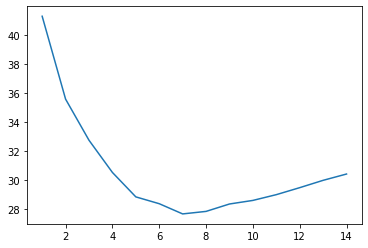

In [140]:
plt.plot(depth, np.array(mape))
plt.show()

Select  depth=7 or 8 to get  the best model without feature engineering. We chose depth=8 as it gave the lowest MAPE.

In [141]:
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)
y_pred=reg_tree.predict(X_valid)
# RMSE
rmse=np.sqrt(np.mean((y_valid - y_pred)**2))
mape=np.mean(np.abs(y_valid - y_pred)/y_valid)*100

In [142]:
rmse, mape

(237023.24886004583, 27.871863491990016)

#### SCOPE: Hypertuning the parameters has brought down  the RMSE and MAPE slightly. We will use this model on  our test data. Our intuition is that  zipcode,  as well as some other variables,  will be better predictors and will lower MAPE and RMSE. We will try to create these variables using  feature engineering methods.

### Experiment:  FEATURE ENGINEERING

We are unable to use variables like zipcode, yr_renovated in our analysis as they are categorical variables. Additionally, we wanted to run our  regression tree on the  variable "basement" which simply indicates the presence of a basement (0 vs 1).

In [143]:
#Pandas dummies for transforming zipcode variable
zipcodes = pd.get_dummies(data.zipcode,drop_first=True) #to avoid multicollinearity
data = pd.concat([data, zipcodes], axis='columns')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9757,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9758,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9759,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [144]:
# dummies for transforming "yr_renovated" variable
data["renovated"]=np.where(data["yr_renovated"]>0,1,0)

In [145]:
# dummies for transforming "sqft_basement" variable
data["basement"]=np.where(data["sqft_basement"]>0,1,0)

In [146]:
# log transform of price
log_price = np.log(data.price)
data.insert(89, 'log_price', log_price, True)

In [147]:
#total plot size variable
data["plot_size"]=data["sqft_living"]+data["sqft_lot"]

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 92 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9761 non-null   object 
 1   price          9761 non-null   float64
 2   bedrooms       9761 non-null   int64  
 3   bathrooms      9761 non-null   float64
 4   sqft_living    9761 non-null   int64  
 5   sqft_lot       9761 non-null   int64  
 6   floors         9761 non-null   float64
 7   waterfront     9761 non-null   int64  
 8   view           9761 non-null   int64  
 9   condition      9761 non-null   int64  
 10  grade          9761 non-null   int64  
 11  sqft_above     9761 non-null   int64  
 12  sqft_basement  9761 non-null   int64  
 13  yr_built       9761 non-null   int64  
 14  yr_renovated   9761 non-null   int64  
 15  zipcode        9761 non-null   int64  
 16  sqft_living15  9761 non-null   int64  
 17  sqft_lot15     9761 non-null   int64  
 18  house_ag

### Experiment:   MODEL FITTING AFTER FEATURE ENGINEERING 

#### Model 1:  Adding feature engineered variables to the best model we found before feature engineering  

In [162]:
X_train=data[['plot_size','grade','house_age','renovated']]
y_train = data.log_price

In [204]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [205]:
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [206]:
y_pred=np.exp(reg_tree.predict(X_valid))
y_valid=np.exp(y_valid)

In [207]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('FEModel1.jpeg')
#plt.show()

In [208]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred))**2)

26322.554077984485

In [209]:
# MAPE (Mean Absolute Percentage Error)
mean_absolute_percentage_error(y_valid,y_pred)

0.2784330809542042

In [214]:
#Hyperparameter tuning 
depth = np.arange(1,15)
mape = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=3)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(mean_absolute_percentage_error(y_valid,np.exp(y_pred))) #MAPE


In [215]:
mape

[0.3577487774535138,
 0.3248022855989325,
 0.30687134131668764,
 0.28596962704965184,
 0.28302121694306853,
 0.2790527154242501,
 0.2784330809542045,
 0.2773091105619301,
 0.27790914822006596,
 0.28279197966076497,
 0.29120622028976706,
 0.29685456794063664,
 0.30404752488974207,
 0.30808296128707474]

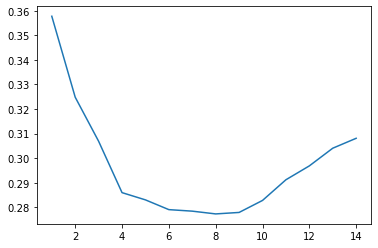

In [216]:
plt.plot(depth, np.array(mape))
plt.show()

In [217]:
#Choose k=8,9

In [220]:
leaf = np.arange(1,15)
mape = []

for i in leaf:
    reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=i)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - np.exp(y_pred))/y_valid)*100) #MAPE

In [221]:
mape

[28.835315516548327,
 28.385906496579956,
 27.79232114294982,
 27.7156651793597,
 27.84820239125313,
 27.85028018834917,
 27.88630441846228,
 27.952716225533493,
 27.833780993529132,
 27.768217210987267,
 27.793943107299707,
 27.883843238642086,
 27.799426951166563,
 27.737811681723834]

Choose depth=9,leaf=2 where MAPE is the lowest (27.392)  , which is what we chose before hyperparameter tuning. This is the lowest  error we can get after feature engineering in this model. We will implement  this on the  test data. 

#### Model 2: Our next model includes zipcodes created with one-hot encoding. 

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 92 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9761 non-null   object 
 1   price          9761 non-null   float64
 2   bedrooms       9761 non-null   int64  
 3   bathrooms      9761 non-null   float64
 4   sqft_living    9761 non-null   int64  
 5   sqft_lot       9761 non-null   int64  
 6   floors         9761 non-null   float64
 7   waterfront     9761 non-null   int64  
 8   view           9761 non-null   int64  
 9   condition      9761 non-null   int64  
 10  grade          9761 non-null   int64  
 11  sqft_above     9761 non-null   int64  
 12  sqft_basement  9761 non-null   int64  
 13  yr_built       9761 non-null   int64  
 14  yr_renovated   9761 non-null   int64  
 15  zipcode        9761 non-null   int64  
 16  sqft_living15  9761 non-null   int64  
 17  sqft_lot15     9761 non-null   int64  
 18  house_ag

In [224]:
#We also tried feature engineering on zipcode, however, the MAPE was 0.86, which hinted at  an  error in our  encoding.
X_train = data.drop(['sqft_above','price','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_train = data.price

In [225]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [226]:
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [227]:
y_pred=reg_tree.predict(X_valid)
y_pred

array([569845.84782609, 257290.87628866, 332306.82129743, ...,
       332306.82129743, 332306.82129743, 332306.82129743])

In [228]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('FEModel2.jpeg')
#plt.show()

In [229]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

246512.86442092847

In [230]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

27.039067396947363

### Experiment: Model Testing  

In [231]:
test=pd.read_csv("/Users/aanchalkhanna72/Downloads/kc_house_test_data.csv")
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [232]:
len(test)

2217

In [233]:
#cleaning the data, as was done with train data
data[data['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98168,98177,98178,98188,98198,98199,renovated,log_price,basement,plot_size


In [234]:
data[data['bathrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98168,98177,98178,98188,98198,98199,renovated,log_price,basement,plot_size


In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2217 non-null   int64  
 1   date           2217 non-null   object 
 2   price          2217 non-null   float64
 3   bedrooms       2217 non-null   int64  
 4   bathrooms      2217 non-null   float64
 5   sqft_living    2217 non-null   int64  
 6   sqft_lot       2217 non-null   int64  
 7   floors         2217 non-null   float64
 8   waterfront     2217 non-null   int64  
 9   view           2217 non-null   int64  
 10  condition      2217 non-null   int64  
 11  grade          2217 non-null   int64  
 12  sqft_above     2217 non-null   int64  
 13  sqft_basement  2217 non-null   int64  
 14  yr_built       2217 non-null   int64  
 15  yr_renovated   2217 non-null   int64  
 16  zipcode        2217 non-null   int64  
 17  lat            2217 non-null   float64
 18  long    

Since there  no anomalies with bedrooms/bathrooms=0 or any null  values, we don't need to make any  changes.

In [236]:
test.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.217000e+03,2.217000e+03,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000
mean,4.628092e+09,5.386429e+05,3.353631,2.099008,2073.439783,13554.643212,1.496166,0.005864,0.227334,3.412720,7.648173,1791.431213,282.008570,1971.046459,86.330627,98079.107352,47.557274,-122.215217,1985.875056,12147.815065
std,2.910469e+09,3.584223e+05,0.867263,0.757563,897.054209,29606.430361,0.543553,0.076368,0.755074,0.665472,1.150964,836.477490,423.914803,29.505233,405.893265,52.951950,0.136144,0.140791,686.149119,22904.986531
min,1.000102e+06,8.300000e+04,1.000000,0.500000,420.000000,683.000000,1.000000,0.000000,0.000000,1.000000,4.000000,420.000000,0.000000,1900.000000,0.000000,98001.000000,47.194200,-122.511000,399.000000,755.000000
25%,2.117700e+09,3.200000e+05,3.000000,1.500000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.469800,-122.329000,1490.000000,5078.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7526.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98070.000000,47.567000,-122.235000,1830.000000,7551.000000
75%,7.462900e+09,6.350000e+05,4.000000,2.500000,2490.000000,10464.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,540.000000,1997.000000,0.000000,98118.000000,47.674500,-122.127000,2370.000000,10000.000000
max,9.839301e+09,3.850000e+06,9.000000,6.000000,7850.000000,435600.000000,3.500000,1.000000,4.000000,5.000000,12.000000,7850.000000,2570.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.352000,6210.000000,292645.000000


In [255]:
#creating variable "house_age" and "log_price"
house_age = 2015 - test['yr_built']
test.insert(21, 'house_age', house_age, True)

In [251]:
#plot size
test["plot_size"]=test["sqft_living"]+test["sqft_lot"]

In [240]:
# log transform of price
log_price = np.log(test.price)
test.insert(21, 'log_price', log_price, True)

In [241]:
#creating dummies for "renovated","basement"
test['renovated'] = np.where(test['yr_renovated'] > 0, 1, 0)
test['basement'] = np.where(test['sqft_basement'] > 0, 1, 0)

In [242]:
#one-hot encoding for zipcodes
zipcodes = pd.get_dummies(test.zipcode, drop_first=True)
test = pd.concat([test, zipcodes], axis='columns')

In [284]:
#Running two models on test data 

X_test = test.drop(['id','lat','long','sqft_above','price','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_test = test.price

In [286]:
X_train = data.drop(['sqft_above','price','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_train = data.price

In [287]:
X_test.head()

,sqft_living,sqft_lot,view,condition,grade,house_age,renovated,basement,98002,98003,...,98148,98155,98166,98168,98177,98178,98188,98198,98199,plot_size
0,1890,6560,0,3,7,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8450
1,1810,4850,0,3,7,115,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6660
2,1200,9850,0,4,7,94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,11050
3,2330,5000,0,4,7,86,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7330
4,1220,8075,0,2,7,46,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9295


In [288]:
#fitting the model
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2) 
reg_tree.fit(X_test,y_test)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [289]:
#predicting y_test in this the model
y_predt=reg_tree.predict(X_test)
y_predt

array([360621.46089385, 633536.36363636, 299474.21827411, ...,
       584377.        , 332058.95652174, 332058.95652174])

In [290]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('TestModel1.jpeg')
#plt.show()

In [291]:
# RMSE
np.sqrt(np.mean((y_test - y_predt)**2))

139839.4885327038

In [292]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_predt)/y_test)*100

22.363276674901613

#### SCOPE: Our model shows MAPE of 13% which means that on aaverage,  our predicted values are 13% away  from the actual values. We will also try our model with zipcode on our test data.

###  Experiment: Running Model 2 (withOUT zipcode feature engineer variable) on  test data

In [256]:
X_train=data[['plot_size','grade','house_age','renovated']]
y_train = data.log_price


In [263]:
X_test = test[['plot_size','grade','house_age','renovated']]
y_test=test.price

In [265]:
#fitting the model
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2) 
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [272]:
#predicting y_test in this model
y_predt=np.exp(reg_tree.predict(X_test))


In [273]:
#Plotting Reg Decision Tree
#fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
#tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
#plt.savefig('TestModel2.jpeg')
#plt.show()

In [274]:
# RMSE (Root mean squared error)
np.sqrt(np.mean((y_test - y_predt)**2))

249509.35949937164

In [275]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_predt)/y_test)*100

29.366185550928535

The error  in  our model is comparable to models without feature engineered variables.